# EDA and ML Models
### Coded by: Omar Mamon Hamed

---

#### Import libraries needed  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline


#### Read data

In [2]:
data = pd.read_csv('first intern project.csv')
data.head(10)

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   
5   INN00006                 1                   0                         0   
6   INN00007                 1                   1                         1   
7   INN00008                 3                   0                         1   
8   INN00009                 1                   1                         0   
9   INN00010                 2                   0                         0   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   
5                      2   Meal Plan 2                  0  Room_Type 1   
6                      4   Meal Plan 1                  0  Room_Type 1   
7                      3   Meal Plan 1                  0  Room_Type 4   
8                      4   Meal Plan 1                  0  Room_Type 1   
9                      5   Meal Plan 1                  0  Room_Type 4   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   
5        346             Offline         0    0        0          100.00   
6         34              Online         0    0        0          107.55   
7         83              Online         0    0        0          105.61   
8        121             Offline         0    0        0           96.90   
9         44              Online         0    0        0          133.44   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled  
5                 1           9/13/2016       Canceled  
6                 1          10/15/2017   Not_Canceled  
7                 1          12/26/2018   Not_Canceled  
8                 1            7/6/2018   Not_Canceled  
9                 3          10/18/2018   Not_Canceled

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
data.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [5]:
# Rename unclear columns
data.rename(columns={
    'P-C': 'Previously Canceled',
    'P-not-C': 'Previously not Canceled',
    'repeated': 'Old Customer',
    'average price ': 'average price',
}, inplace=True)
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  Old Customer  Previously Canceled  \
0        224             Offline             0                    0   
1          5              Online             0                    0   
2          1              Online             0                    0   
3        211              Online             0                    0   
4         48              Online             0                    0   

   Previously not Canceled  average price  special requests  \
0                        0          88.00                 0   
1                        0         106.68                 1   
2                        0          50.00                 0   
3                        0         100.00                 1   
4                        0          77.00                 0   

  date of reservation booking status  
0           10/2/2015   Not_Canceled  
1           11/6/2018   Not_Canceled  
2           2/28/2018       Canceled  
3           5/20/2017       Canceled  
4           4/11/2018       Canceled

In [6]:
# Get unique values for each column
market_segments = data['market segment type'].unique()
room_types = data['room type'].unique()
meal_types = data['type of meal'].unique()

# Print the unique values in a readable format
print("Unique Market Segment Types:")
print(", ".join(market_segments))

print("\nUnique Room Types:")
print(", ".join(room_types))

print("\nUnique Meal Types:")
print(", ".join(meal_types))

Unique Market Segment Types:
Offline, Online, Corporate, Aviation, Complementary

Unique Room Types:
Room_Type 1, Room_Type 4, Room_Type 2, Room_Type 6, Room_Type 5, Room_Type 7, Room_Type 3

Unique Meal Types:
Meal Plan 1, Not Selected, Meal Plan 2, Meal Plan 3


#### Some statistics about data

In [7]:
# Display statistics of the dataset
data.describe(include='all')


Booking_ID  number of adults  number of children  \
count       36285      36285.000000        36285.000000   
unique      36285               NaN                 NaN   
top      INN36286               NaN                 NaN   
freq            1               NaN                 NaN   
mean          NaN          1.844839            0.105360   
std           NaN          0.518813            0.402704   
min           NaN          0.000000            0.000000   
25%           NaN          2.000000            0.000000   
50%           NaN          2.000000            0.000000   
75%           NaN          2.000000            0.000000   
max           NaN          4.000000           10.000000   

        number of weekend nights  number of week nights type of meal  \
count               36285.000000           36285.000000        36285   
unique                       NaN                    NaN            4   
top                          NaN                    NaN  Meal Plan 1   
freq                         NaN                    NaN        27842   
mean                    0.810693               2.204602          NaN   
std                     0.870590               1.410946          NaN   
min                     0.000000               0.000000          NaN   
25%                     0.000000               1.000000          NaN   
50%                     1.000000               2.000000          NaN   
75%                     2.000000               3.000000          NaN   
max                     7.000000              17.000000          NaN   

        car parking space    room type     lead time market segment type  \
count        36285.000000        36285  36285.000000               36285   
unique                NaN            7           NaN                   5   
top                   NaN  Room_Type 1           NaN              Online   
freq                  NaN        28138           NaN               23221   
mean             0.030977          NaN     85.239851                 NaN   
std              0.173258          NaN     85.938796                 NaN   
min              0.000000          NaN      0.000000                 NaN   
25%              0.000000          NaN     17.000000                 NaN   
50%              0.000000          NaN     57.000000                 NaN   
75%              0.000000          NaN    126.000000                 NaN   
max              1.000000          NaN    443.000000                 NaN   

        Old Customer  Previously Canceled  Previously not Canceled  \
count   36285.000000         36285.000000             36285.000000   
unique           NaN                  NaN                      NaN   
top              NaN                  NaN                      NaN   
freq             NaN                  NaN                      NaN   
mean        0.025630             0.023343                 0.153369   
std         0.158032             0.368281                 1.753931   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000                 0.000000   
50%         0.000000             0.000000                 0.000000   
75%         0.000000             0.000000                 0.000000   
max         1.000000            13.000000                58.000000   

        average price  special requests date of reservation booking status  
count    36285.000000      36285.000000               36285          36285  
unique            NaN               NaN                 553              2  
top               NaN               NaN          10/13/2018   Not_Canceled  
freq              NaN               NaN                 254          24396  
mean       103.421636          0.619733                 NaN            NaN  
std         35.086469          0.786262                 NaN            NaN  
min          0.000000          0.000000                 NaN            NaN  
25%         80.300000          0.000000                 NaN    

#### Cleaning of data

In [8]:
data_cleaned = data.copy()

1. Correct date

In [9]:
# convert date of reservation to datetime format and check for nulls
data_cleaned['date of reservation'] = pd.to_datetime(data_cleaned['date of reservation'], errors='coerce')
data_cleaned['date of reservation'].isnull().sum()

np.int64(37)

In [10]:
# Show rows where 'date of reservation' is null
data_cleaned[data_cleaned['date of reservation'].isnull()][['date of reservation']].head(8)

date of reservation
2626                 NaT
3677                 NaT
5600                 NaT
6343                 NaT
7648                 NaT
8000                 NaT
8989                 NaT
9153                 NaT

In [11]:
# show the data in the row 2626 ,3677 , 5600
data.loc[[2626, 3677, 5600]][['date of reservation']]

date of reservation
2626           2018-2-29
3677           2018-2-29
5600           2018-2-29

In [12]:
# drop null values in date of reservation
data_cleaned.dropna(subset=['date of reservation'], inplace=True)
data_cleaned['date of reservation'].head()

0   2015-10-02
1   2018-11-06
2   2018-02-28
3   2017-05-20
4   2018-04-11
Name: date of reservation, dtype: datetime64[ns]

In [13]:
# Extract the year, month, and day from the date of reservation
data_cleaned['reservation_year'] = data_cleaned['date of reservation'].dt.year
data_cleaned['reservation_month'] = data_cleaned['date of reservation'].dt.month
data_cleaned['reservation_day'] = data_cleaned['date of reservation'].dt.day

# Drop the date of reservation column
data_cleaned.drop('date of reservation', axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
data_cleaned.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  Old Customer  Previously Canceled  \
0        224             Offline             0                    0   
1          5              Online             0                    0   
2          1              Online             0                    0   
3        211              Online             0                    0   
4         48              Online             0                    0   

   Previously not Canceled  average price  special requests booking status  \
0                        0          88.00                 0   Not_Canceled   
1                        0         106.68                 1   Not_Canceled   
2                        0          50.00                 0       Canceled   
3                        0         100.00                 1       Canceled   
4                        0          77.00                 0       Canceled   

   reservation_year  reservation_month  reservation_day  
0              2015                 10                2  
1              2018                 11                6  
2              2018                  2               28  
3              2017                  5               20  
4              2018                  4               11

2. Checking outliers

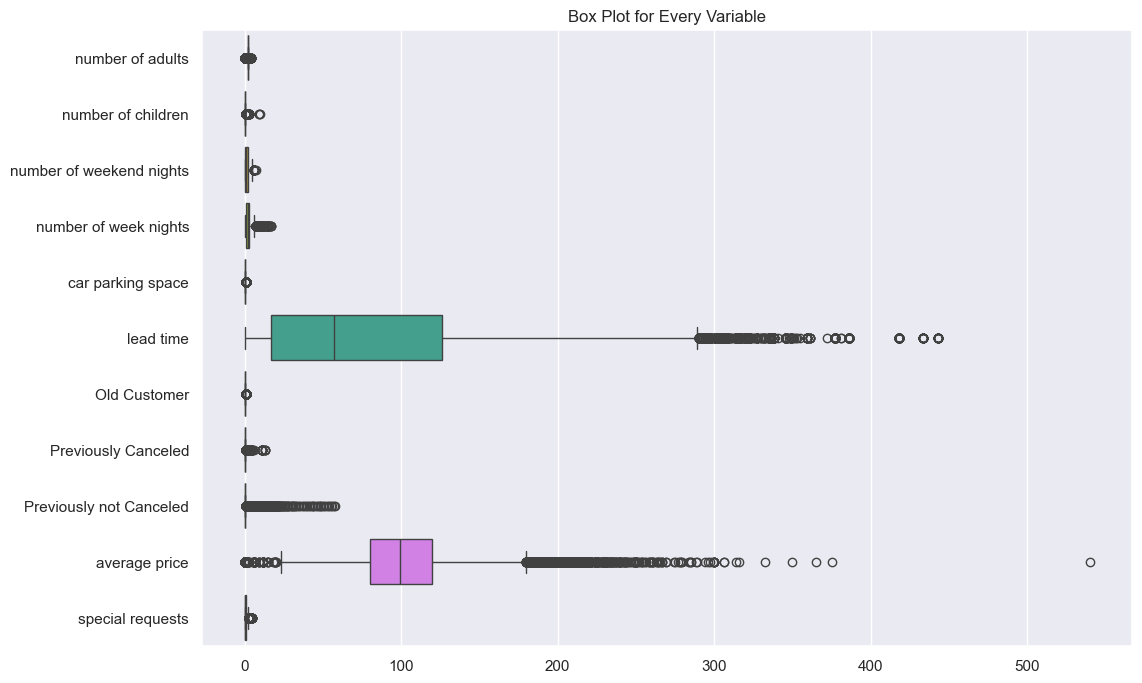

(36248, 16)


In [14]:
# Drop reservation day, month, and year columns
data_cleaned_plot = data_cleaned.drop(columns=['reservation_day', 'reservation_month', 'reservation_year'])

# Create box plots for every variable before dropping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=data_cleaned_plot, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(data_cleaned_plot.shape)

- Handling Lead Time Outliers

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\2032755397.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '85.28236040609137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.loc[data_cleaned['lead time'] >q3 , 'lead time'] = mean_lead_time


Text(0.5, 1.0, 'Lead Time Boxplot')

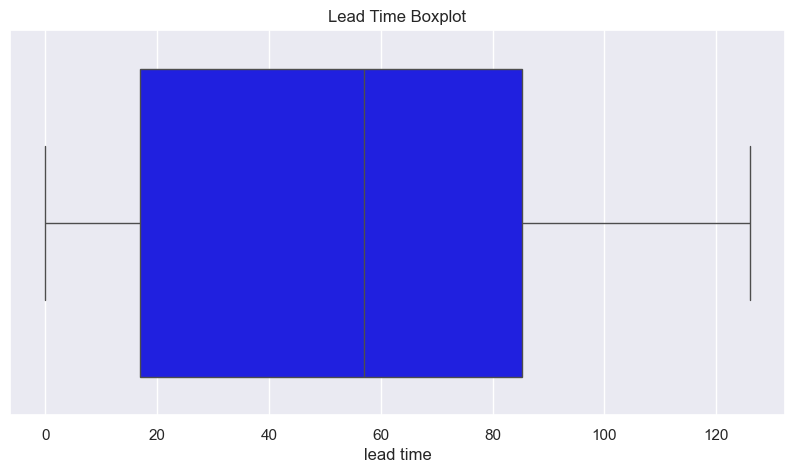

In [15]:
# fill lead time outliers with mean
mean_lead_time = data_cleaned['lead time'].mean()

# get q3
q3 = data_cleaned['lead time'].quantile(0.75)

# fill outliers with mean
data_cleaned.loc[data_cleaned['lead time'] >q3 , 'lead time'] = mean_lead_time

# draw boxplot again
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_cleaned['lead time'], color='blue')
plt.title('Lead Time Boxplot')

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\888289973.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='market segment type', y='average price', data=data_cleaned, palette='viridis')


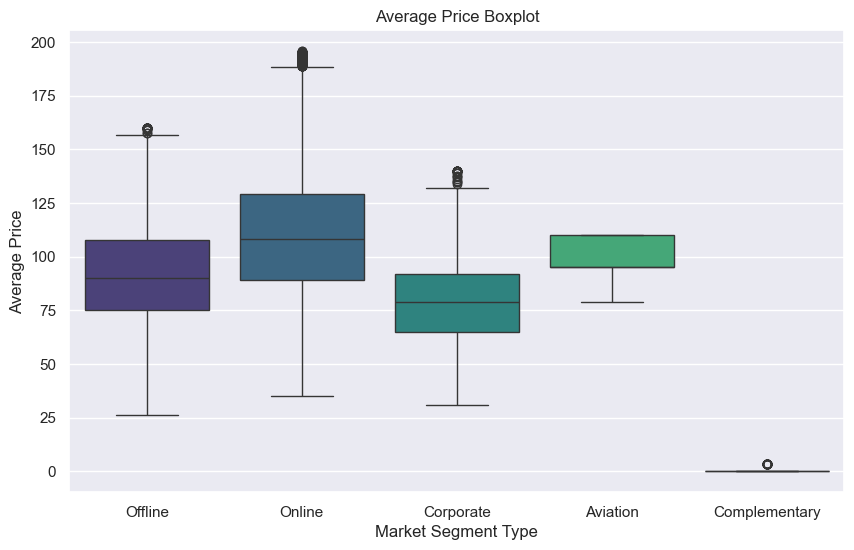

In [16]:
# Average Price fill outliers with mean depending on the market segment type ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']

# Calculate the mean average price for each market segment type
market_segment_means = data_cleaned.groupby('market segment type')['average price'].mean().to_dict()

# Fill outliers in 'average price' with the mean of the corresponding market segment type
for segment in data['market segment type'].unique():
    mean_price = market_segment_means[segment]
    
    # Calculate Q1, Q3, and IQR
    segment_data = data[data['market segment type'] == segment]
    q1 = segment_data['average price'].quantile(0.25)
    q3 = segment_data['average price'].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the segment mean
    data_cleaned.loc[(data_cleaned['market segment type'] == segment) & 
             ((data_cleaned['average price'] < lower_bound) | (data_cleaned['average price'] > upper_bound)), 
             'average price'] = mean_price

# Draw the boxplot again for each maeket segment type
plt.figure(figsize=(10, 6))
sns.boxplot(x='market segment type', y='average price', data=data_cleaned, palette='viridis')
plt.title('Average Price Boxplot')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price')
plt.show()


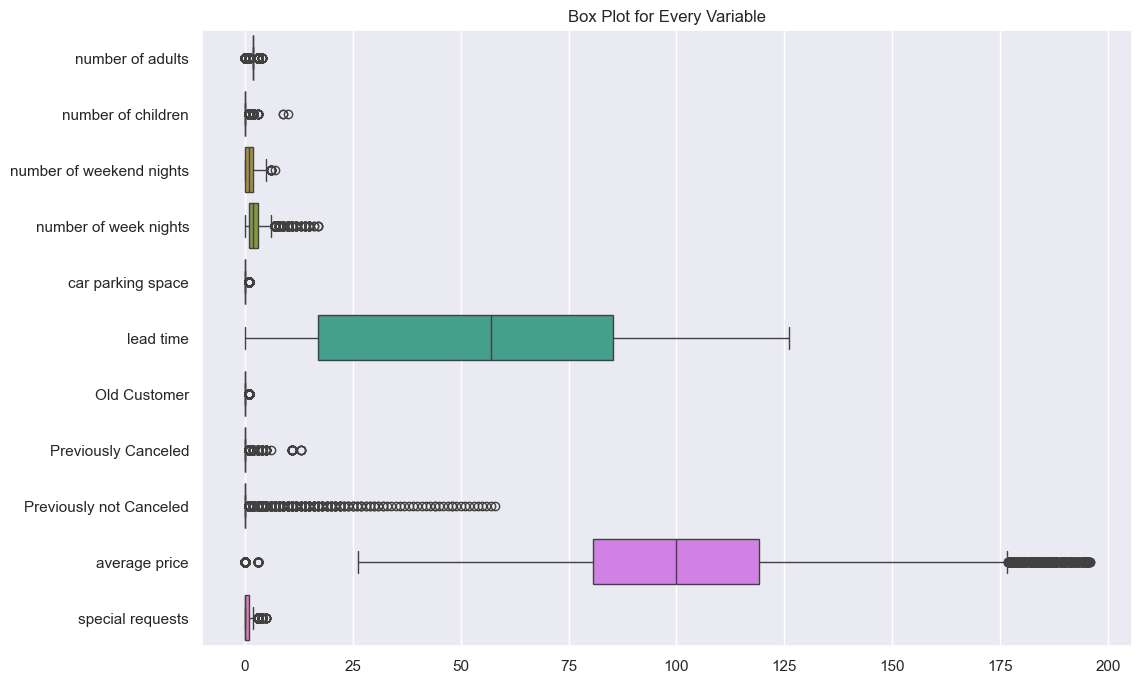

(36248, 16)


In [17]:
# Drop reservation day, month, and year columns
data_cleaned_plot = data_cleaned.drop(columns=['reservation_day', 'reservation_month', 'reservation_year'])

# Create box plots for every variable before dropping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=data_cleaned_plot, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(data_cleaned_plot.shape)

#### Encode the columns to make correlation matrix

In [18]:
# drop booking id
data_cleaned.drop('Booking_ID', axis=1 , inplace=True) 

# Apply Label Encoding
le = LabelEncoder()
data_cleaned['room type'] = le.fit_transform(data_cleaned['room type'])
data_cleaned['type of meal'] = le.fit_transform(data_cleaned['type of meal'])
data_cleaned['market segment type'] = le.fit_transform(data_cleaned['market segment type'])
data_cleaned['booking status'] = le.fit_transform(data_cleaned['booking status'])

In [19]:
# Add total nights column to the dataframe
data_cleaned['total nights'] = data_cleaned['number of weekend nights'] + data_cleaned['number of week nights']

### Feature Engineering

In [20]:
correlation_matrix = data_cleaned.corr()
correlation_with_booking_status = correlation_matrix['booking status'].abs().sort_values(ascending=False)
print(correlation_with_booking_status)

booking status              1.000000
lead time                   0.337545
special requests            0.253361
reservation_year            0.179431
average price               0.137702
market segment type         0.135750
Old Customer                0.107479
total nights                0.103304
number of week nights       0.092732
number of adults            0.086525
car parking space           0.086047
number of weekend nights    0.061630
Previously not Canceled     0.060041
Previously Canceled         0.033868
number of children          0.032962
type of meal                0.026582
room type                   0.023203
reservation_month           0.012007
reservation_day             0.011195
Name: booking status, dtype: float64


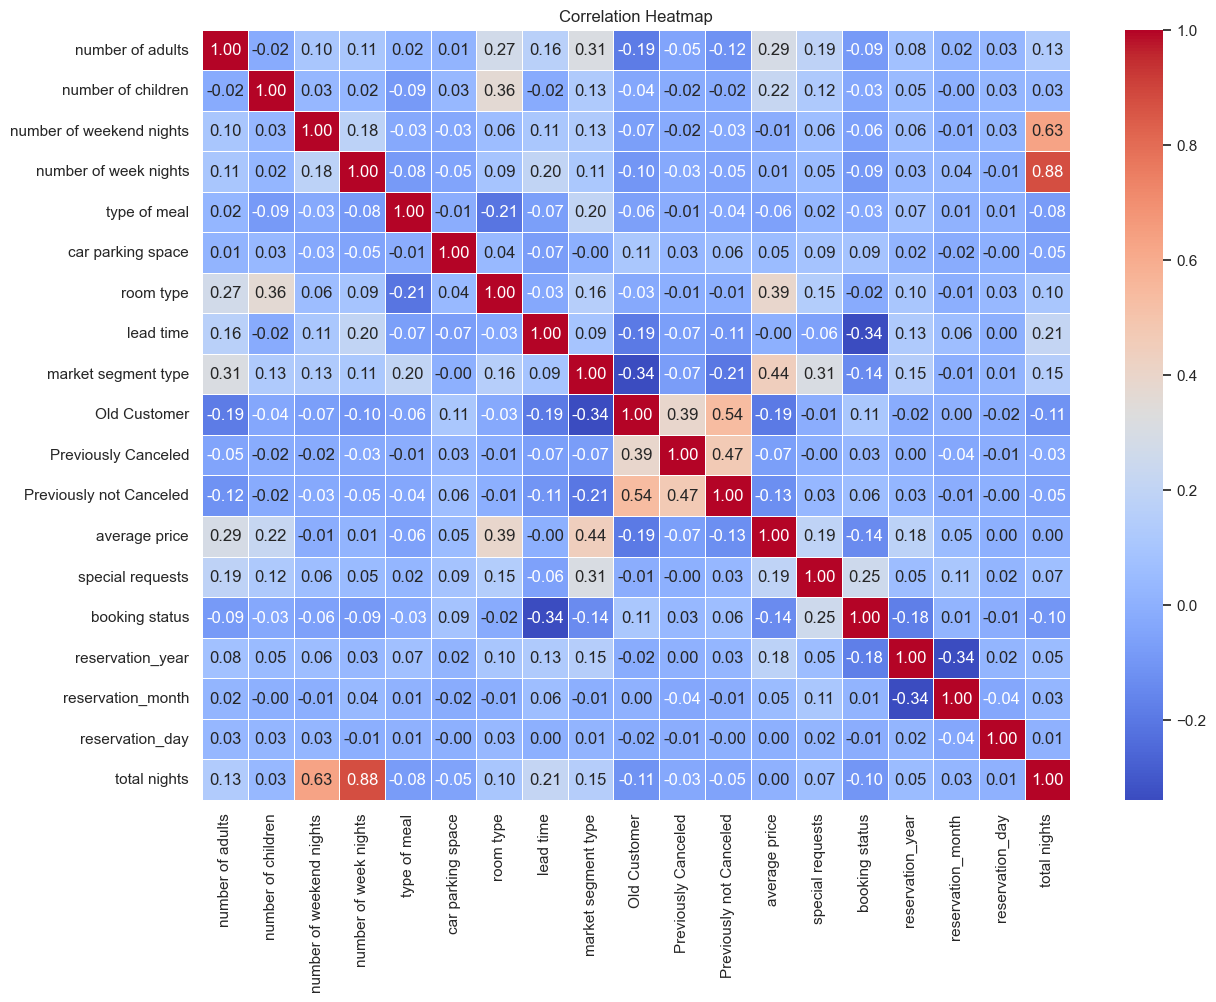

In [21]:
# Compute and Visualize the Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Insights and Visualization

In this section, we will explore and visualize the insights derived from our data analysis and modeling process. The visualizations will help us understand the relationships between different features and the booking status, as well as the performance of our machine learning models.


In [22]:
# copy data_cleaned to data_copy
data_copy = data_cleaned.copy()

In [23]:
market_segment_mapping = {
    0: "Aviation",
    1: "Complementary",
    2: "Corporate",
    3: "Offline",
    4: "Online"
}

Room_mapping = {
    0: "Room type 1",
    1: "Room type 2",
    2: "Room type 3",
    3: "Room type 4",
    4: "Room type 5",
    5: "Room type 6",
    6: "Room type 7"
}

- How much average price affected by number of adults, number of children, market segment type and room type

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\742654838.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\742654838.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type of meal', y='average price', data=data_copy, palette='viridis')


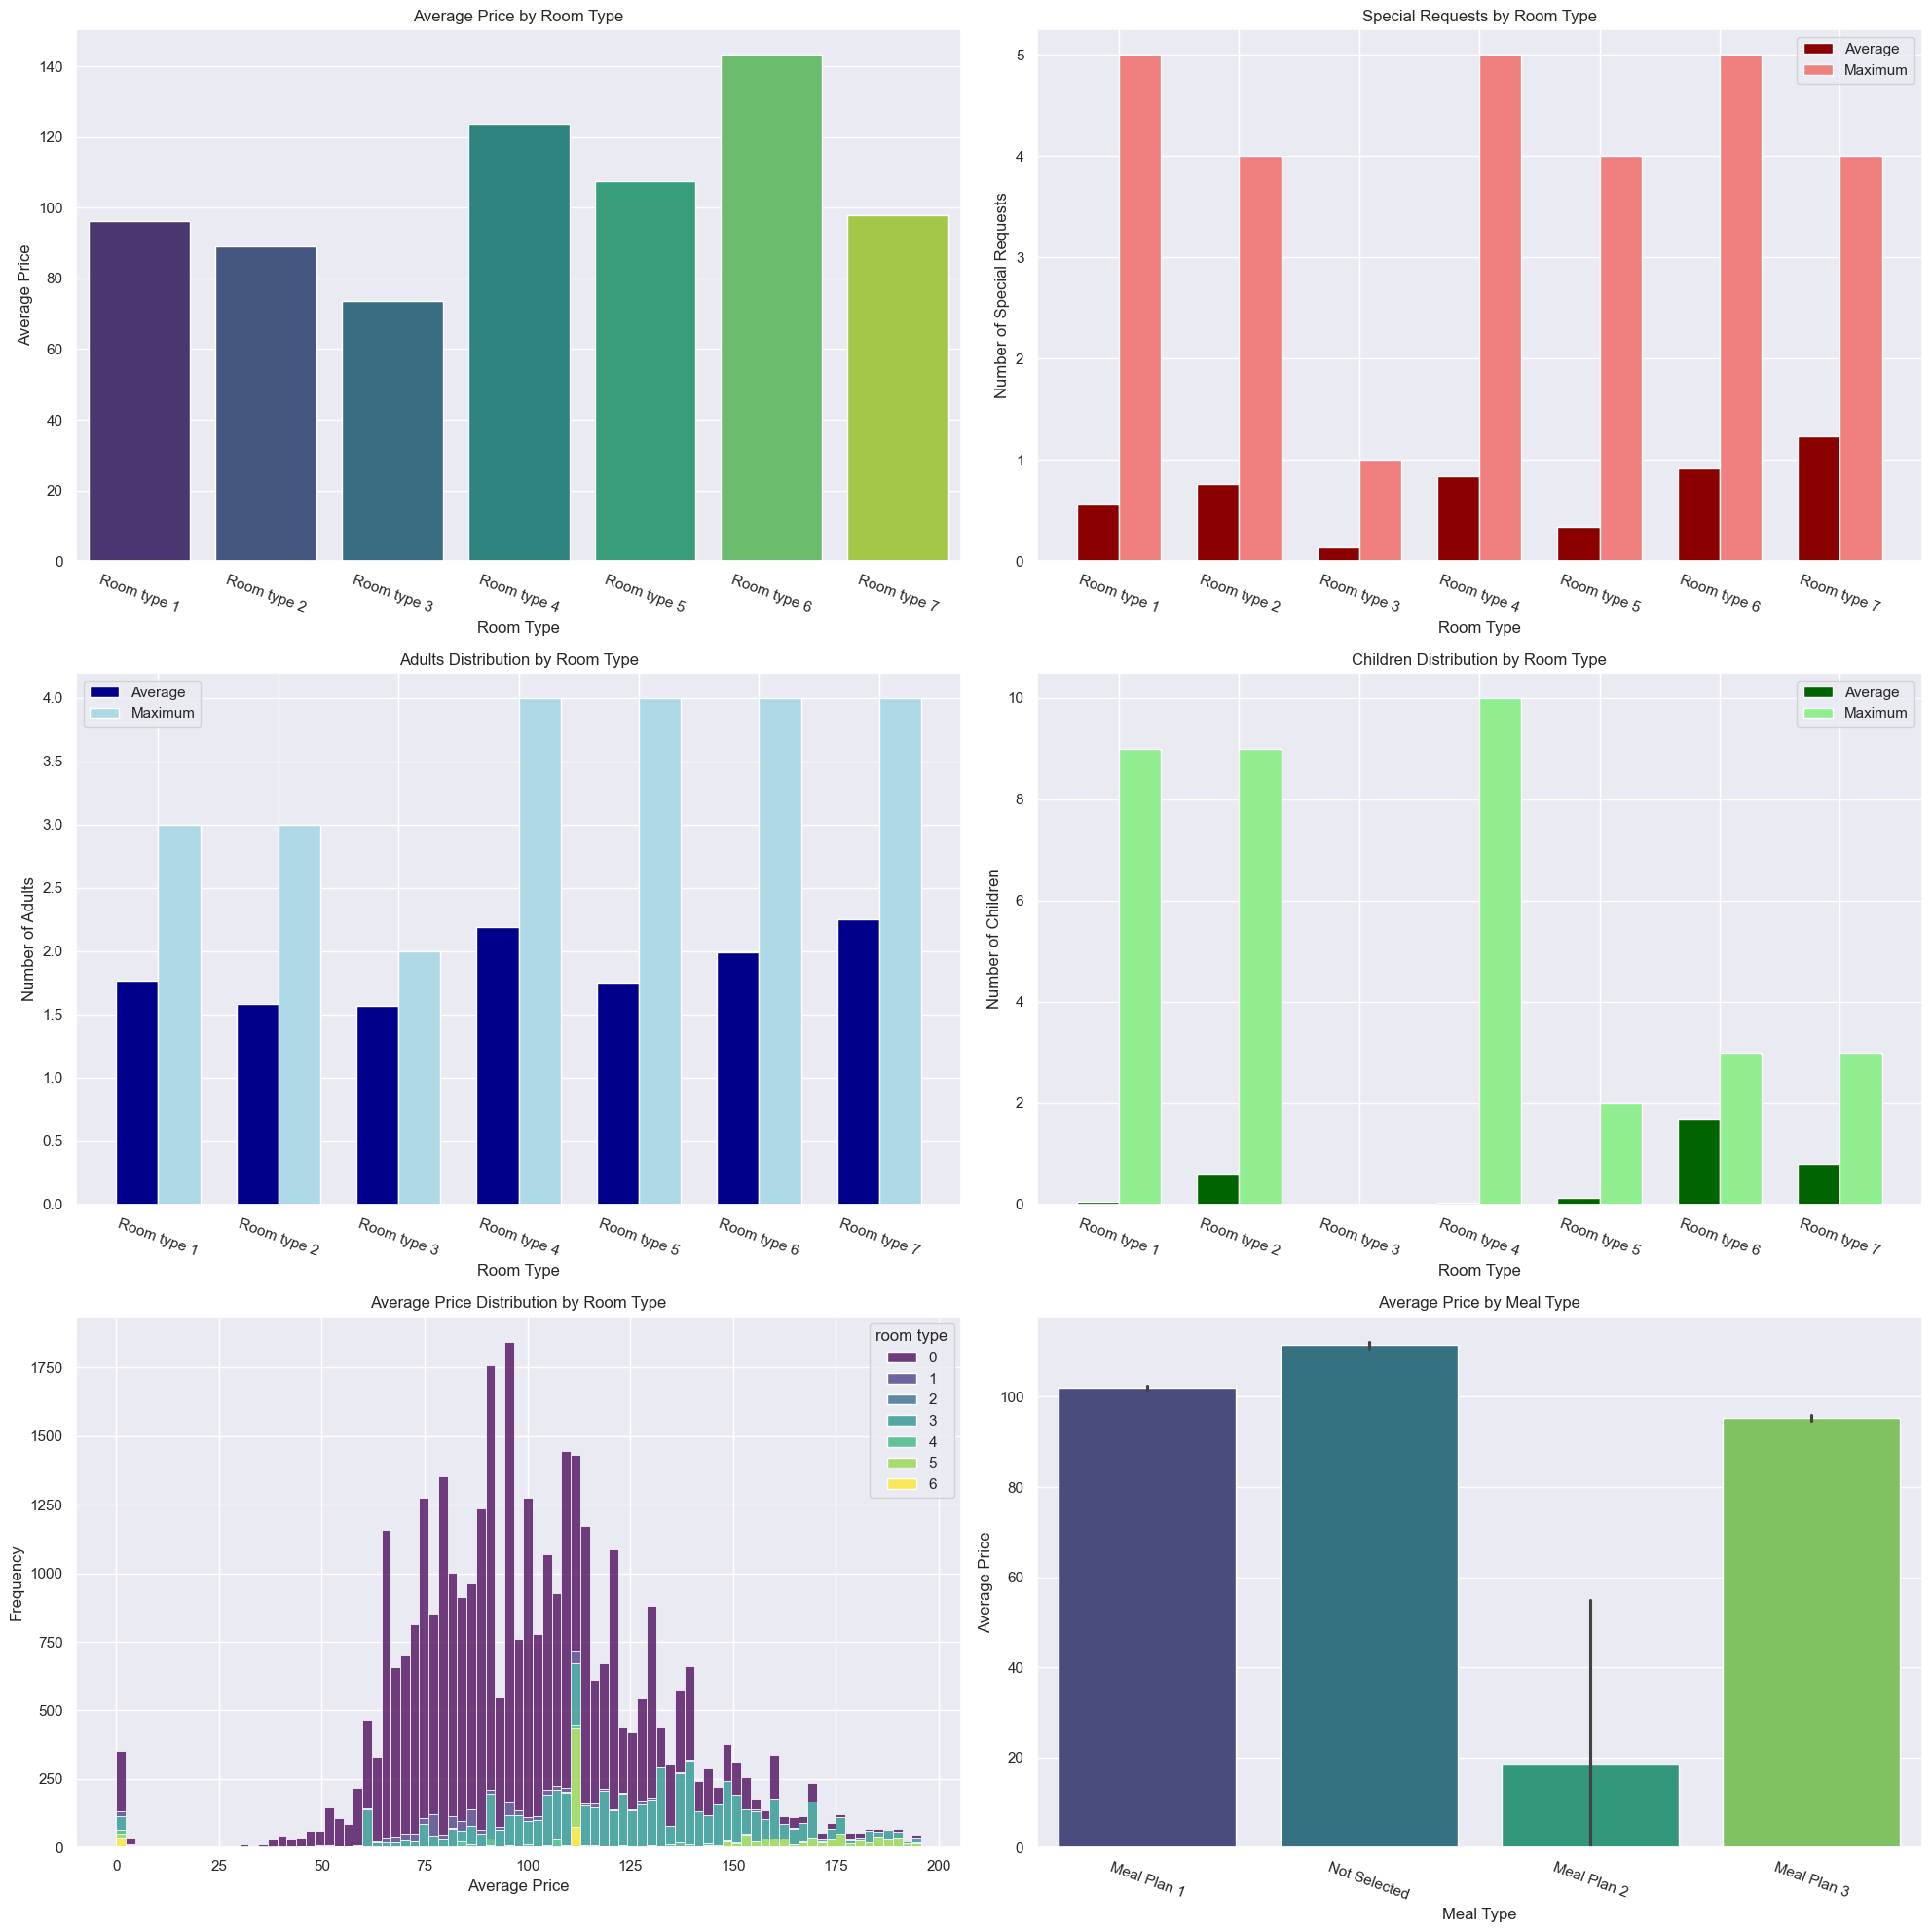

In [24]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 20))

# Calculate statistics for each room type separately
room_stats = data_copy.groupby('room type').agg({
    'average price': 'mean',
    'number of adults': ['mean', 'max'],
    'number of children': ['mean', 'max'],
    'special requests': ['mean', 'max']
}).round(2)

# Plot 1: Average Price vs Room Type
plt.subplot(3, 2, 1)
sns.barplot(x=range(len(room_stats)), y=room_stats[('average price', 'mean')], palette='viridis')
plt.title('Average Price by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(range(len(room_stats)), Room_mapping.values(), rotation=-20)

# Plot 2: Special Requests Distribution by Room Type
plt.subplot(3, 2, 2)
ax = plt.gca()
x = np.arange(len(room_stats))
width = 0.35
ax.bar(x - width/2, room_stats[('special requests', 'mean')], width, label='Average', color='darkred')
ax.bar(x + width/2, room_stats[('special requests', 'max')], width, label='Maximum', color='lightcoral')
plt.title('Special Requests by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Special Requests')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

# Plot 3: Number of Adults Distribution by Room Type
plt.subplot(3, 2, 3)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of adults', 'mean')], width, label='Average', color='darkblue')
ax.bar(x + width/2, room_stats[('number of adults', 'max')], width, label='Maximum', color='lightblue')
plt.title('Adults Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Adults')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

# Plot 4: Number of Children Distribution by Room Type
plt.subplot(3, 2, 4)
ax = plt.gca()
ax.bar(x - width/2, room_stats[('number of children', 'mean')], width, label='Average', color='darkgreen')
ax.bar(x + width/2, room_stats[('number of children', 'max')], width, label='Maximum', color='lightgreen')
plt.title('Children Distribution by Room Type', fontsize=12)
plt.xlabel('Room Type')
plt.ylabel('Number of Children')
plt.legend()
plt.xticks(x, Room_mapping.values(), rotation=-20)

# Plot 5: Average Price Distribution by Room Type
plt.subplot(3, 2, 5)
sns.histplot(data=data_copy, x='average price', hue='room type', multiple='stack', palette='viridis')
plt.title('Average Price Distribution by Room Type', fontsize=12)
plt.xlabel('Average Price')
plt.ylabel('Frequency')

# Plot 6: Average Price by Meal Type
plt.subplot(3, 2, 6)
sns.barplot(x='type of meal', y='average price', data=data_copy, palette='viridis')
plt.title('Average Price by Meal Type', fontsize=12)
plt.xlabel('Meal Type')
plt.ylabel('Average Price')
plt.xticks(ticks=range(len(meal_types)), labels=meal_types, rotation=-20)

plt.tight_layout()
plt.show()


- more focues on histogram for room-type avg or meal type avg

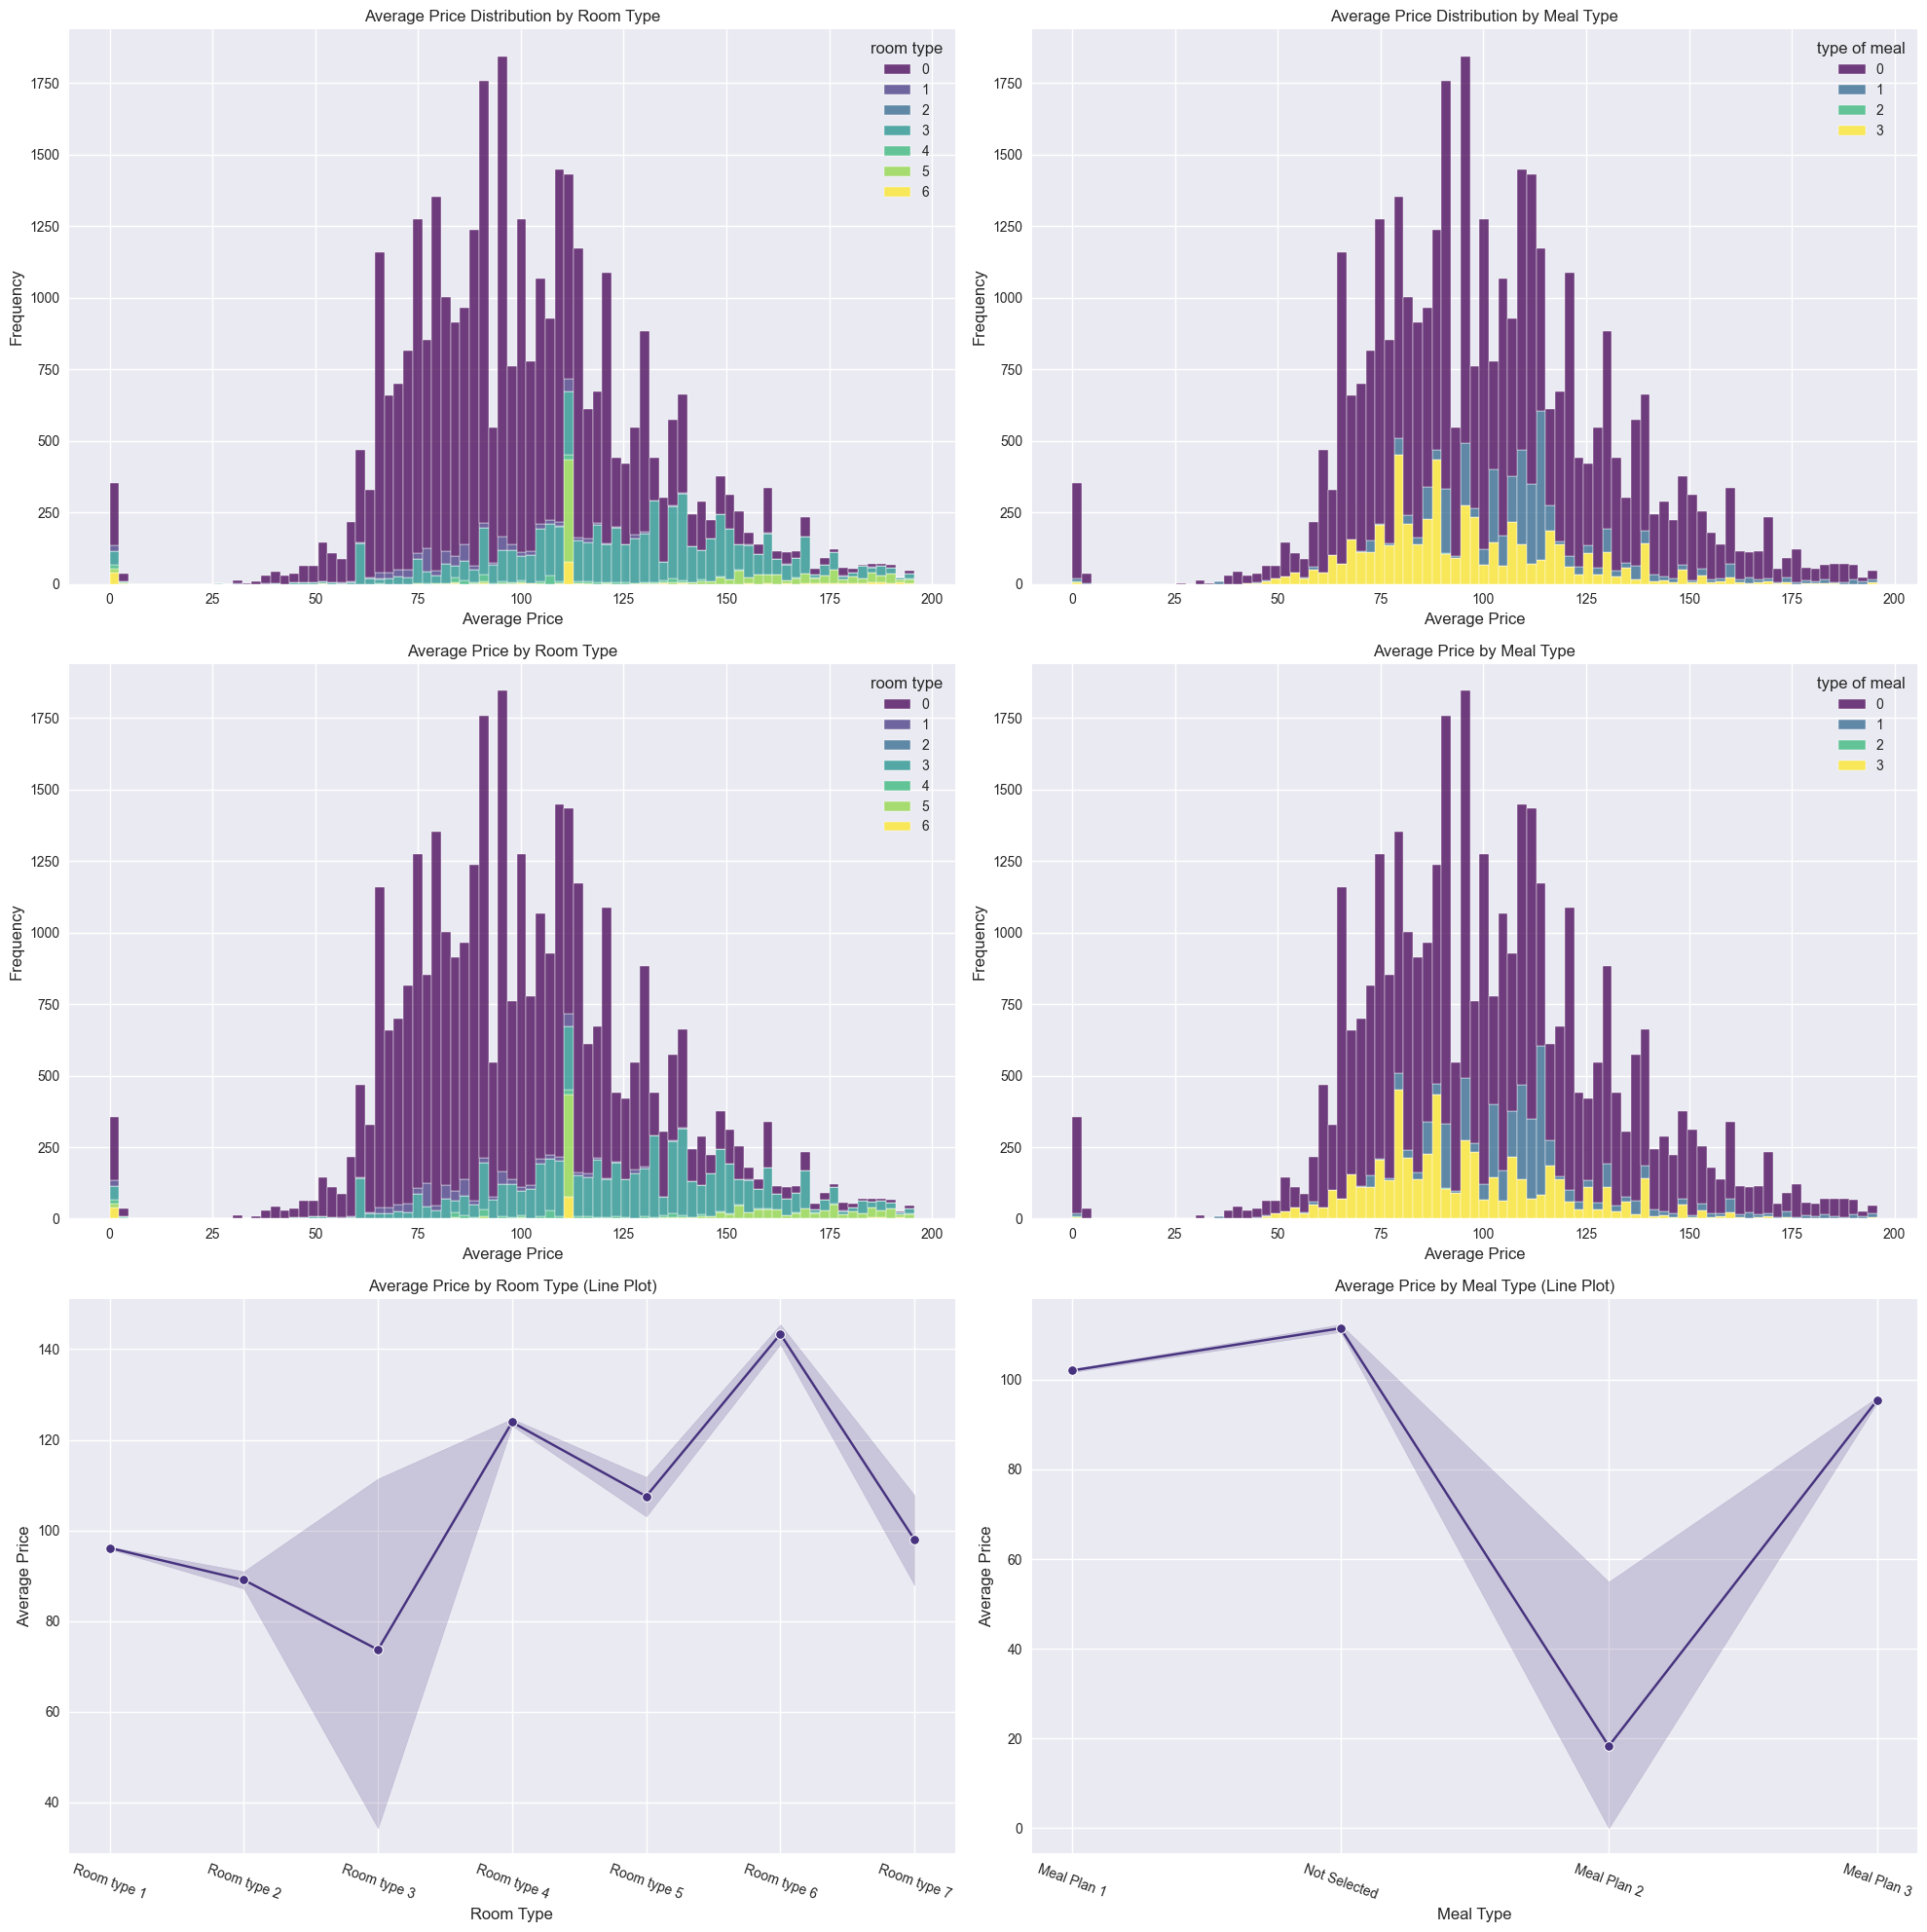

In [25]:
# Set the style and color palette
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Create figure and subplots with adjusted spacing
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Plot 1: Average Price by Room Type (Histogram)
sns.histplot(data=data_copy, x='average price', hue='room type', multiple='stack', palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Average Price Distribution by Room Type', fontsize=12)
ax[0, 0].set_xlabel('Average Price')
ax[0, 0].set_ylabel('Frequency')

# Plot 2: Average Price by Meal Type (Histogram)
sns.histplot(data=data_copy, x='average price', hue='type of meal', multiple='stack', palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Average Price Distribution by Meal Type', fontsize=12)
ax[0, 1].set_xlabel('Average Price')
ax[0, 1].set_ylabel('Frequency')

# Plot 3: Average Price by Room Type (Histogram)
sns.histplot(data=data_copy, x='average price', hue='room type', multiple='stack', palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Average Price by Room Type', fontsize=12)
ax[1, 0].set_xlabel('Average Price')
ax[1, 0].set_ylabel('Frequency')

# Plot 4: Average Price by Meal Type (Histogram)
sns.histplot(data=data_copy, x='average price', hue='type of meal', multiple='stack', palette='viridis', ax=ax[1, 1])
ax[1, 1].set_title('Average Price by Meal Type', fontsize=12)
ax[1, 1].set_xlabel('Average Price')
ax[1, 1].set_ylabel('Frequency')

# Plot 5: Average Price by Room Type (Line Plot)
sns.lineplot(x='room type', y='average price', data=data_copy, marker='o', ax=ax[2, 0])
ax[2, 0].set_title('Average Price by Room Type (Line Plot)', fontsize=12)
ax[2, 0].set_xlabel('Room Type')
ax[2, 0].set_ylabel('Average Price')
ax[2, 0].set_xticks(range(len(Room_mapping)))
ax[2, 0].set_xticklabels(Room_mapping.values(), rotation=-20)

# Plot 6: Average Price by Meal Type (Line Plot)
sns.lineplot(x='type of meal', y='average price', data=data_copy, marker='o', ax=ax[2, 1])
ax[2, 1].set_title('Average Price by Meal Type (Line Plot)', fontsize=12)
ax[2, 1].set_xlabel('Meal Type')
ax[2, 1].set_ylabel('Average Price')
ax[2, 1].set_xticks(range(len(meal_types)))
ax[2, 1].set_xticklabels(meal_types, rotation=-20)

plt.tight_layout()
plt.show()

- Which market segment type is the most frequent in the dataset?

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\718783095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market segment type', data=data, palette='viridis', order=data['market segment type'].value_counts().index)


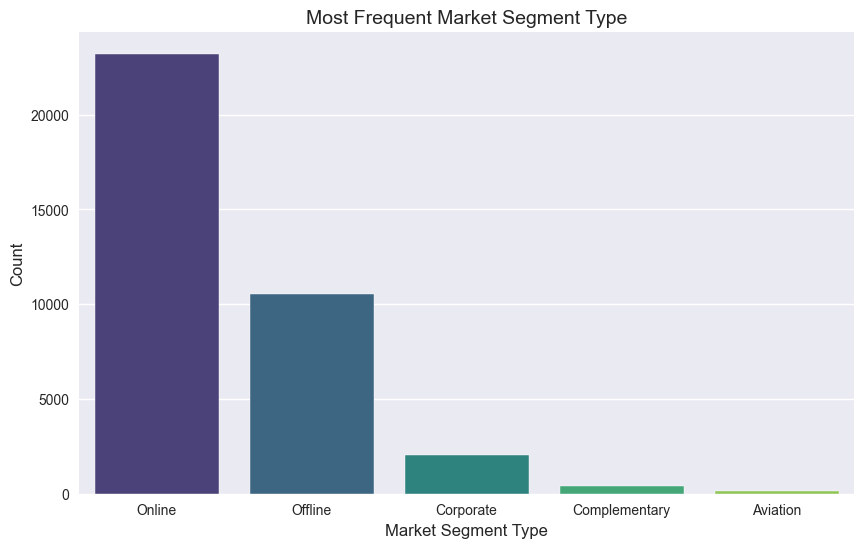

In [26]:
# Plot the most frequent market segment type
plt.figure(figsize=(10, 6))
sns.countplot(x='market segment type', data=data, palette='viridis', order=data['market segment type'].value_counts().index)
plt.title('Most Frequent Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.show()

- Which meal type is the most frequent in the dataset?

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\55708295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type of meal', data=data, palette='viridis', order=data['type of meal'].value_counts().index)


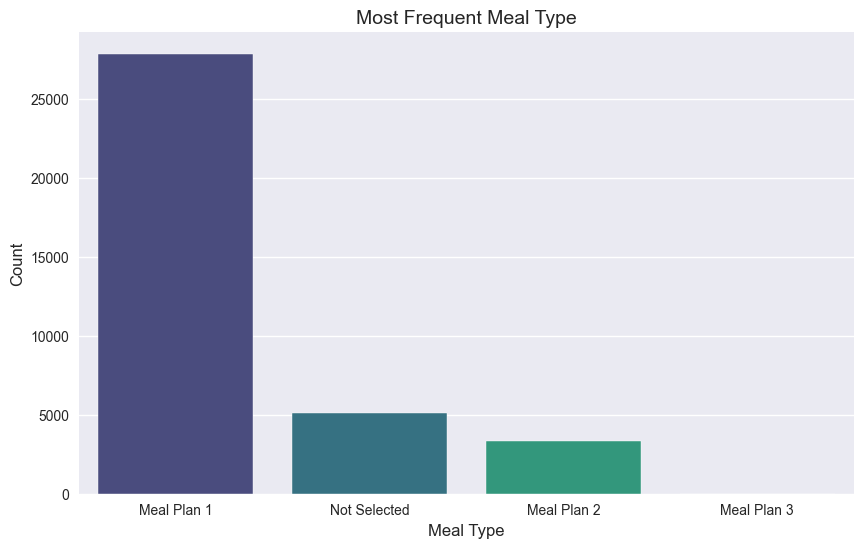

In [27]:
# Plot the most frequent meal type
plt.figure(figsize=(10, 6))
sns.countplot(x='type of meal', data=data, palette='viridis', order=data['type of meal'].value_counts().index)
plt.title('Most Frequent Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()


- Which room type is the most frequent in the dataset?

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\449699227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room type', data=data, palette='viridis', order=data['room type'].value_counts().index)


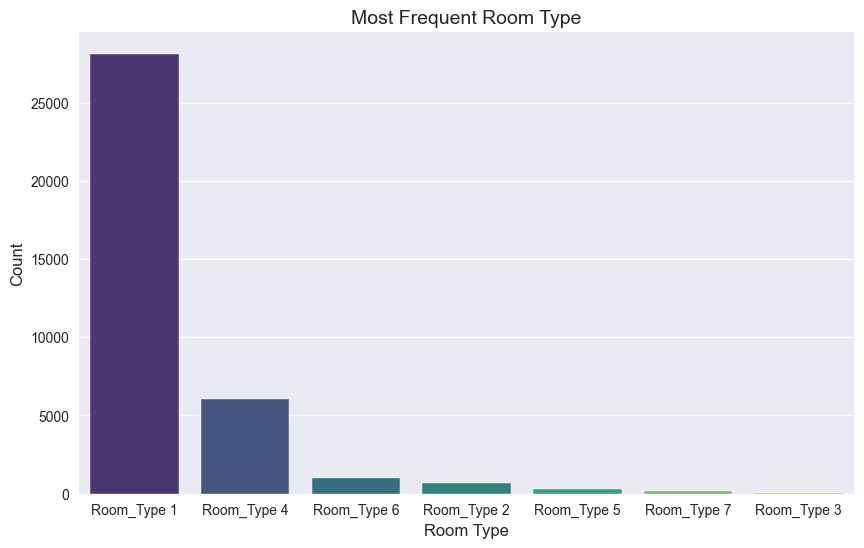

In [28]:
# Plot the most frequent room type
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', data=data, palette='viridis', order=data['room type'].value_counts().index)
plt.title('Most Frequent Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

- How much market segment affects room type and meal type

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\2858423388.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_percentages, palette='deep', ax=ax3)
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\2858423388.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\2858423388.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\2858423388.py:77: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


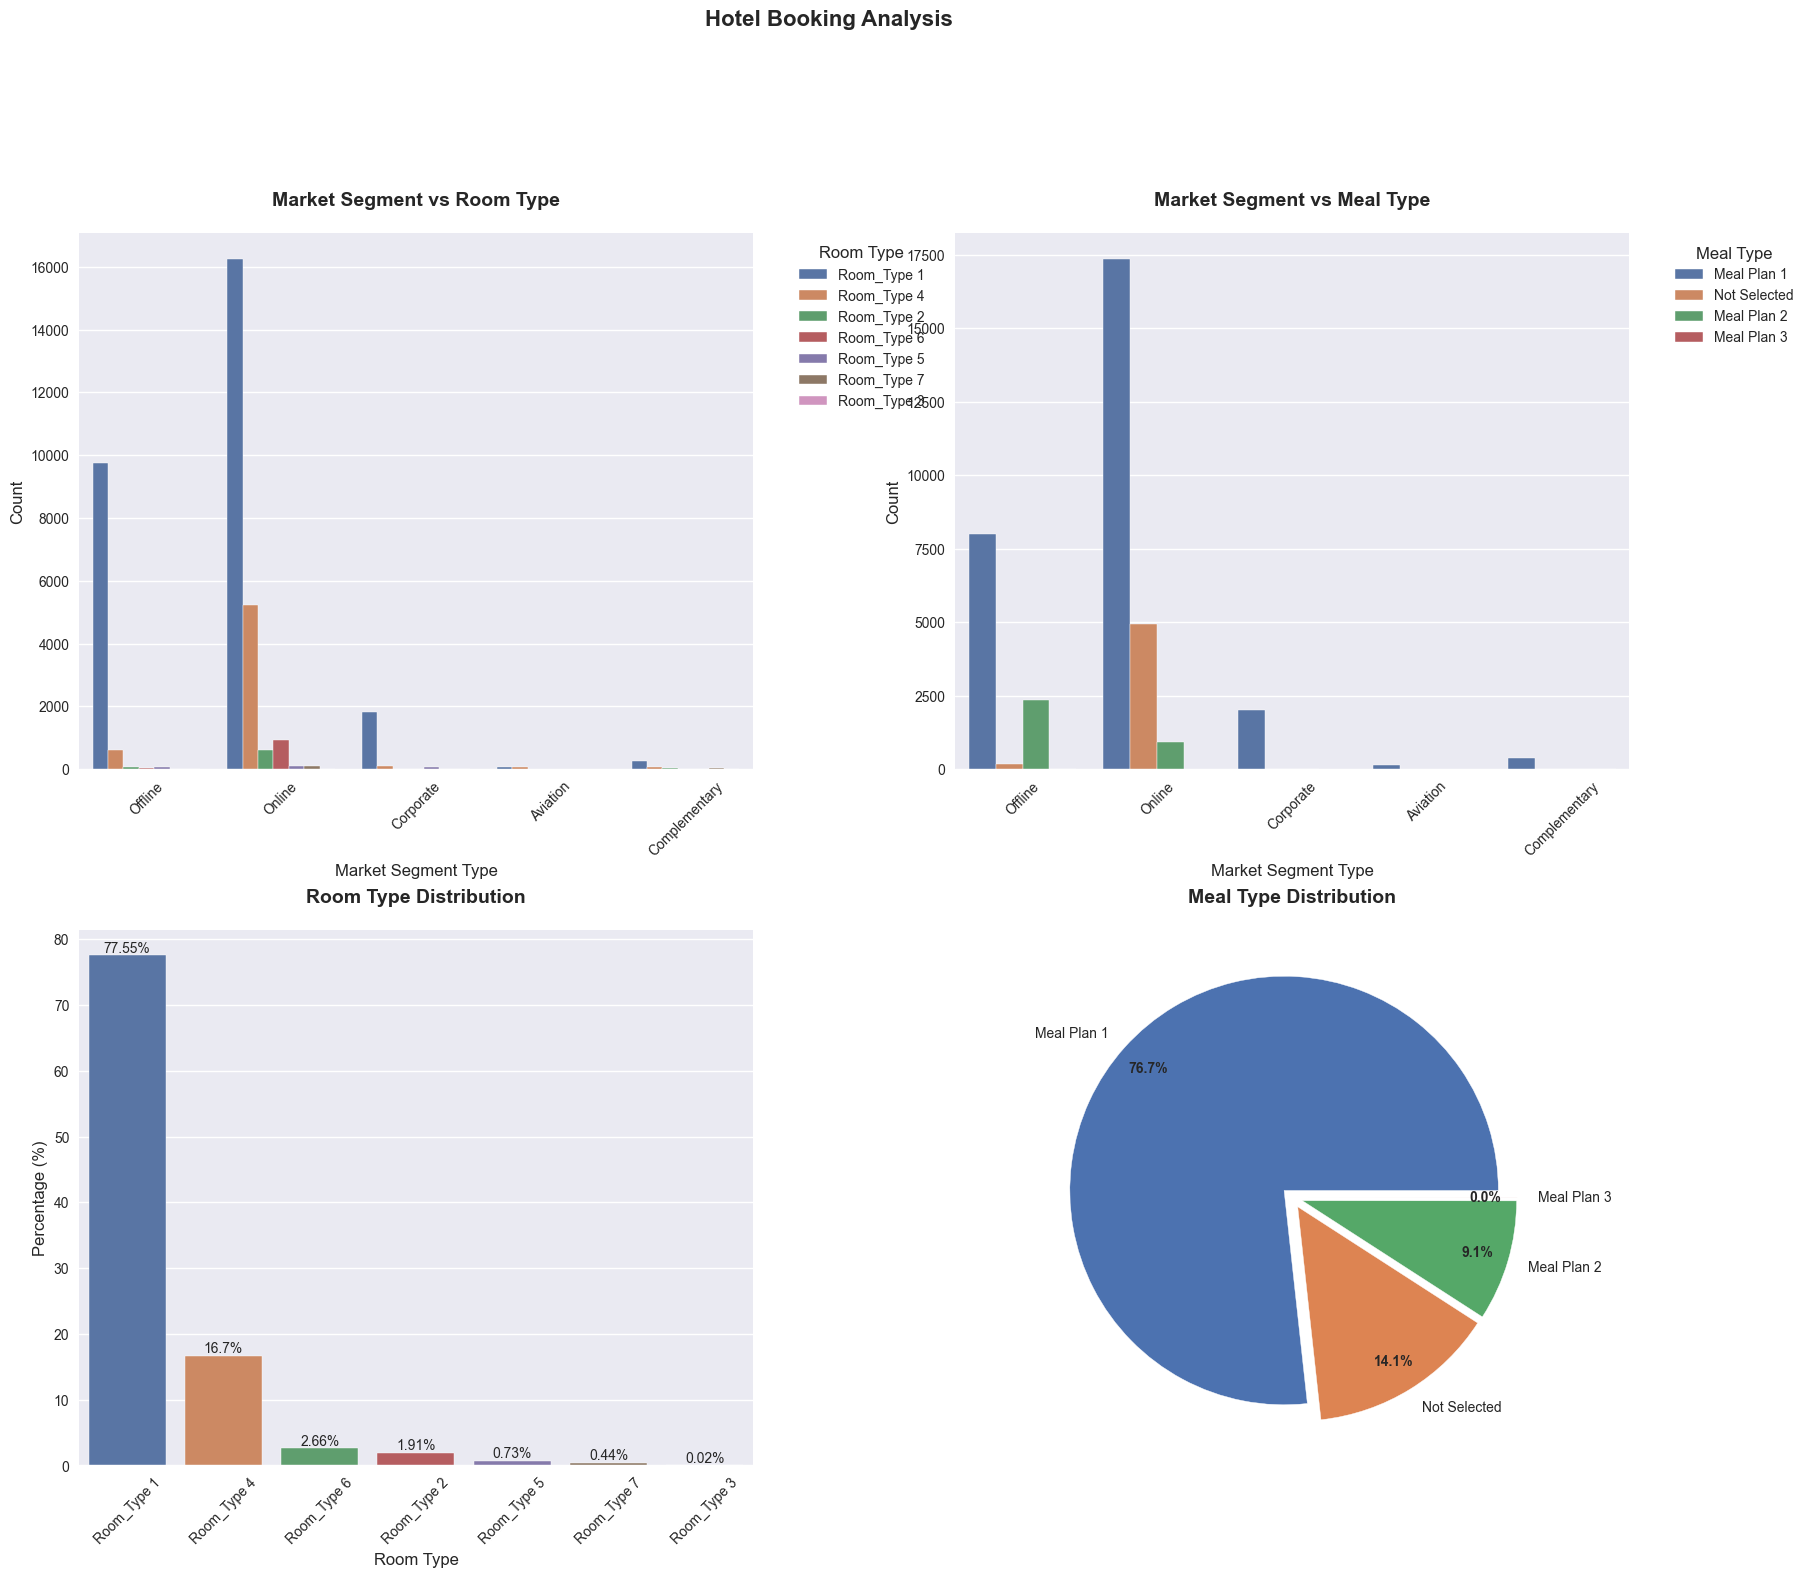

In [29]:
# Set the style and color palette
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Create figure and subplots with adjusted spacing
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Market Segment vs Room Type
ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data=data, 
              x='market segment type', 
              hue='room type',
              palette='deep',
              ax=ax1)
ax1.set_title('Market Segment vs Room Type', pad=20, fontweight='bold')
ax1.set_xlabel('Market Segment Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Market Segment vs Meal Type
ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(data=data, 
              x='market segment type', 
              hue='type of meal',
              palette='deep',
              ax=ax2)
ax2.set_title('Market Segment vs Meal Type', pad=20, fontweight='bold')
ax2.set_xlabel('Market Segment Type')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Meal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Room Type Distribution
ax3 = fig.add_subplot(gs[1, 0])
room_type_counts = data['room type'].value_counts()
room_percentages = (room_type_counts / len(data) * 100).round(2)

sns.barplot(x=room_type_counts.index, y=room_percentages, palette='deep', ax=ax3)
ax3.set_title('Room Type Distribution', pad=20, fontweight='bold')
ax3.set_xlabel('Room Type')
ax3.set_ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for i, v in enumerate(room_percentages):
    ax3.text(i, v, f'{v}%', ha='center', va='bottom')

# Rotate x-axis labels for better readability
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

# Plot 4: Meal Type Distribution
ax4 = fig.add_subplot(gs[1, 1])
meal_type_counts = data['type of meal'].value_counts()
meal_percentages = meal_type_counts / len(data) * 100
colors = sns.color_palette('deep', n_colors=len(meal_type_counts))
wedges, texts, autotexts = ax4.pie(meal_percentages,
                                  labels=meal_type_counts.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,
                                  explode=[0.05] * len(meal_type_counts))
ax4.set_title('Meal Type Distribution', pad=20, fontweight='bold')

# Enhance pie chart text
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Add a main title to the figure
fig.suptitle('Hotel Booking Analysis', fontsize=16, fontweight='bold', y=1.02)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

- How do different market segment types influence the likelihood of a booking being canceled or not?


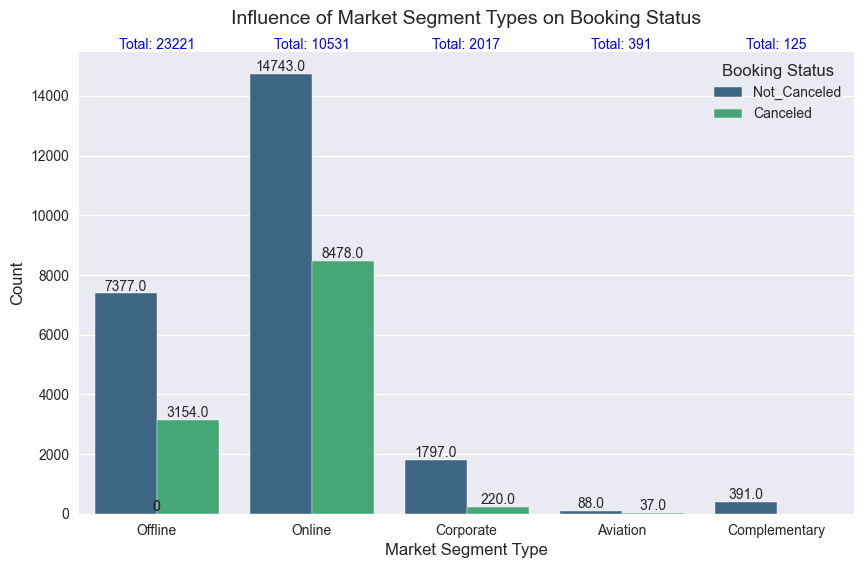

In [30]:
# Plot the countplot for all market segment types
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='market segment type', data=data, hue='booking status', palette='viridis')
plt.title('Influence of Market Segment Types on Booking Status', pad=20)
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.legend(title='Booking Status')

# Annotate the bars with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the number of market reservations
market_reservations = data['market segment type'].value_counts()
for i, (segment, count) in enumerate(market_reservations.items()):
    ax.annotate(f'Total: {count}', (i, ax.get_ylim()[1]), ha='center', va='bottom', fontsize=10, color='blue')

plt.show()


- Which market segment is preferable to most adults and how many cancellations?

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\3117918362.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\3117918362.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


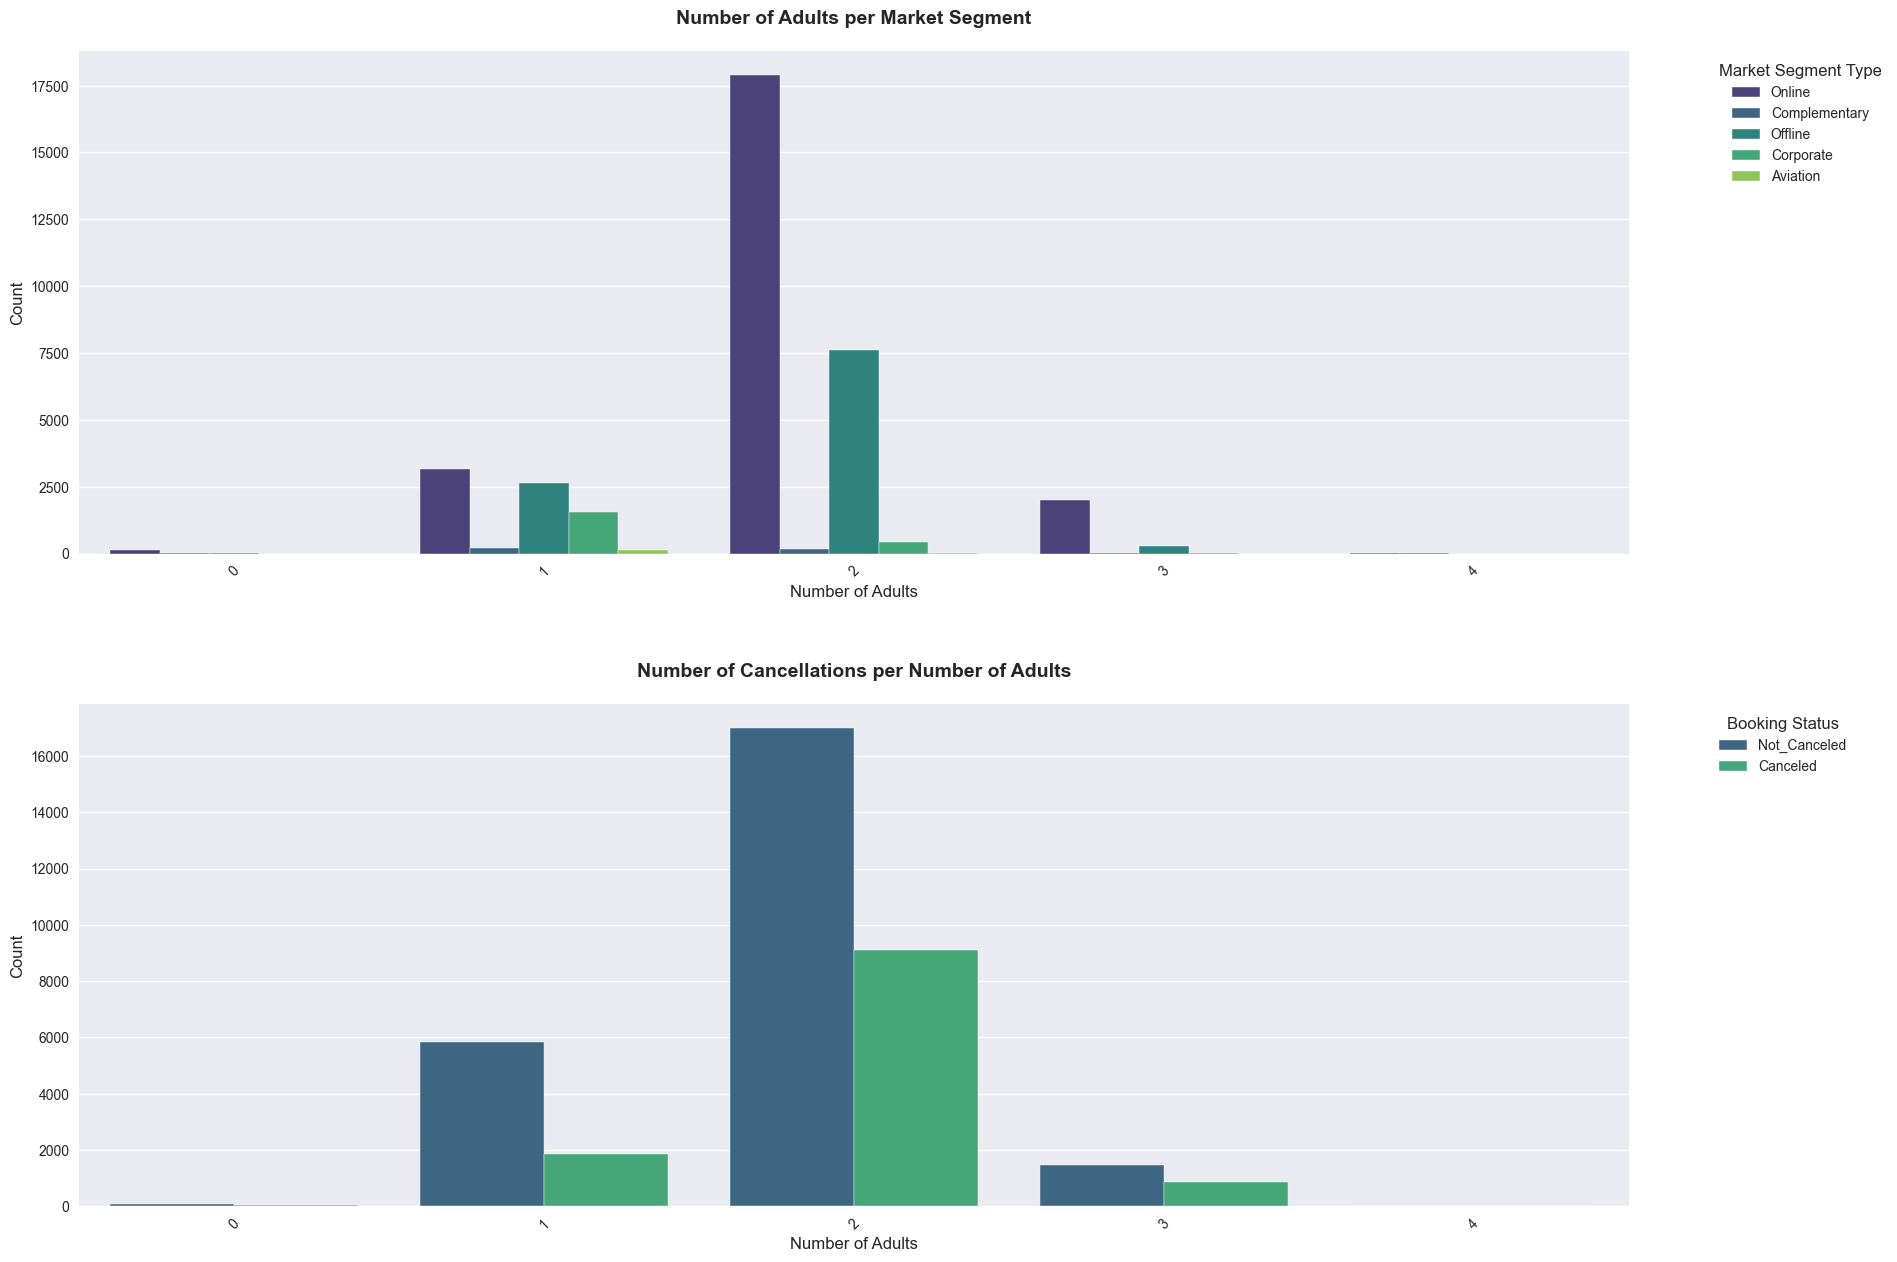

In [31]:
# Set the style and color palette
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Create figure and subplots with adjusted spacing
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 1, hspace=0.3, wspace=0.3)

# Plot 1: Number of Adults per Market Segment
ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data=data, 
              x='number of adults', 
              hue='market segment type', 
              palette='viridis', 
              ax=ax1)
ax1.set_title('Number of Adults per Market Segment', pad=20, fontweight='bold')
ax1.set_xlabel('Number of Adults')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Market Segment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Number of Cancellations per Number of Adults
ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(data=data, 
              x='number of adults', 
              hue='booking status', 
              palette='viridis', 
              ax=ax2)
ax2.set_title('Number of Cancellations per Number of Adults', pad=20, fontweight='bold')
ax2.set_xlabel('Number of Adults')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Booking Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


- Percentage of Cancellations per Month

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\761555659.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0, 0], x=monthly_cancelled_percentage.index, y=monthly_cancelled_percentage.values, palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\761555659.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[2, 0], x=monthly_reservations.index, y=monthly_reservations.values, palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\761555659.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 

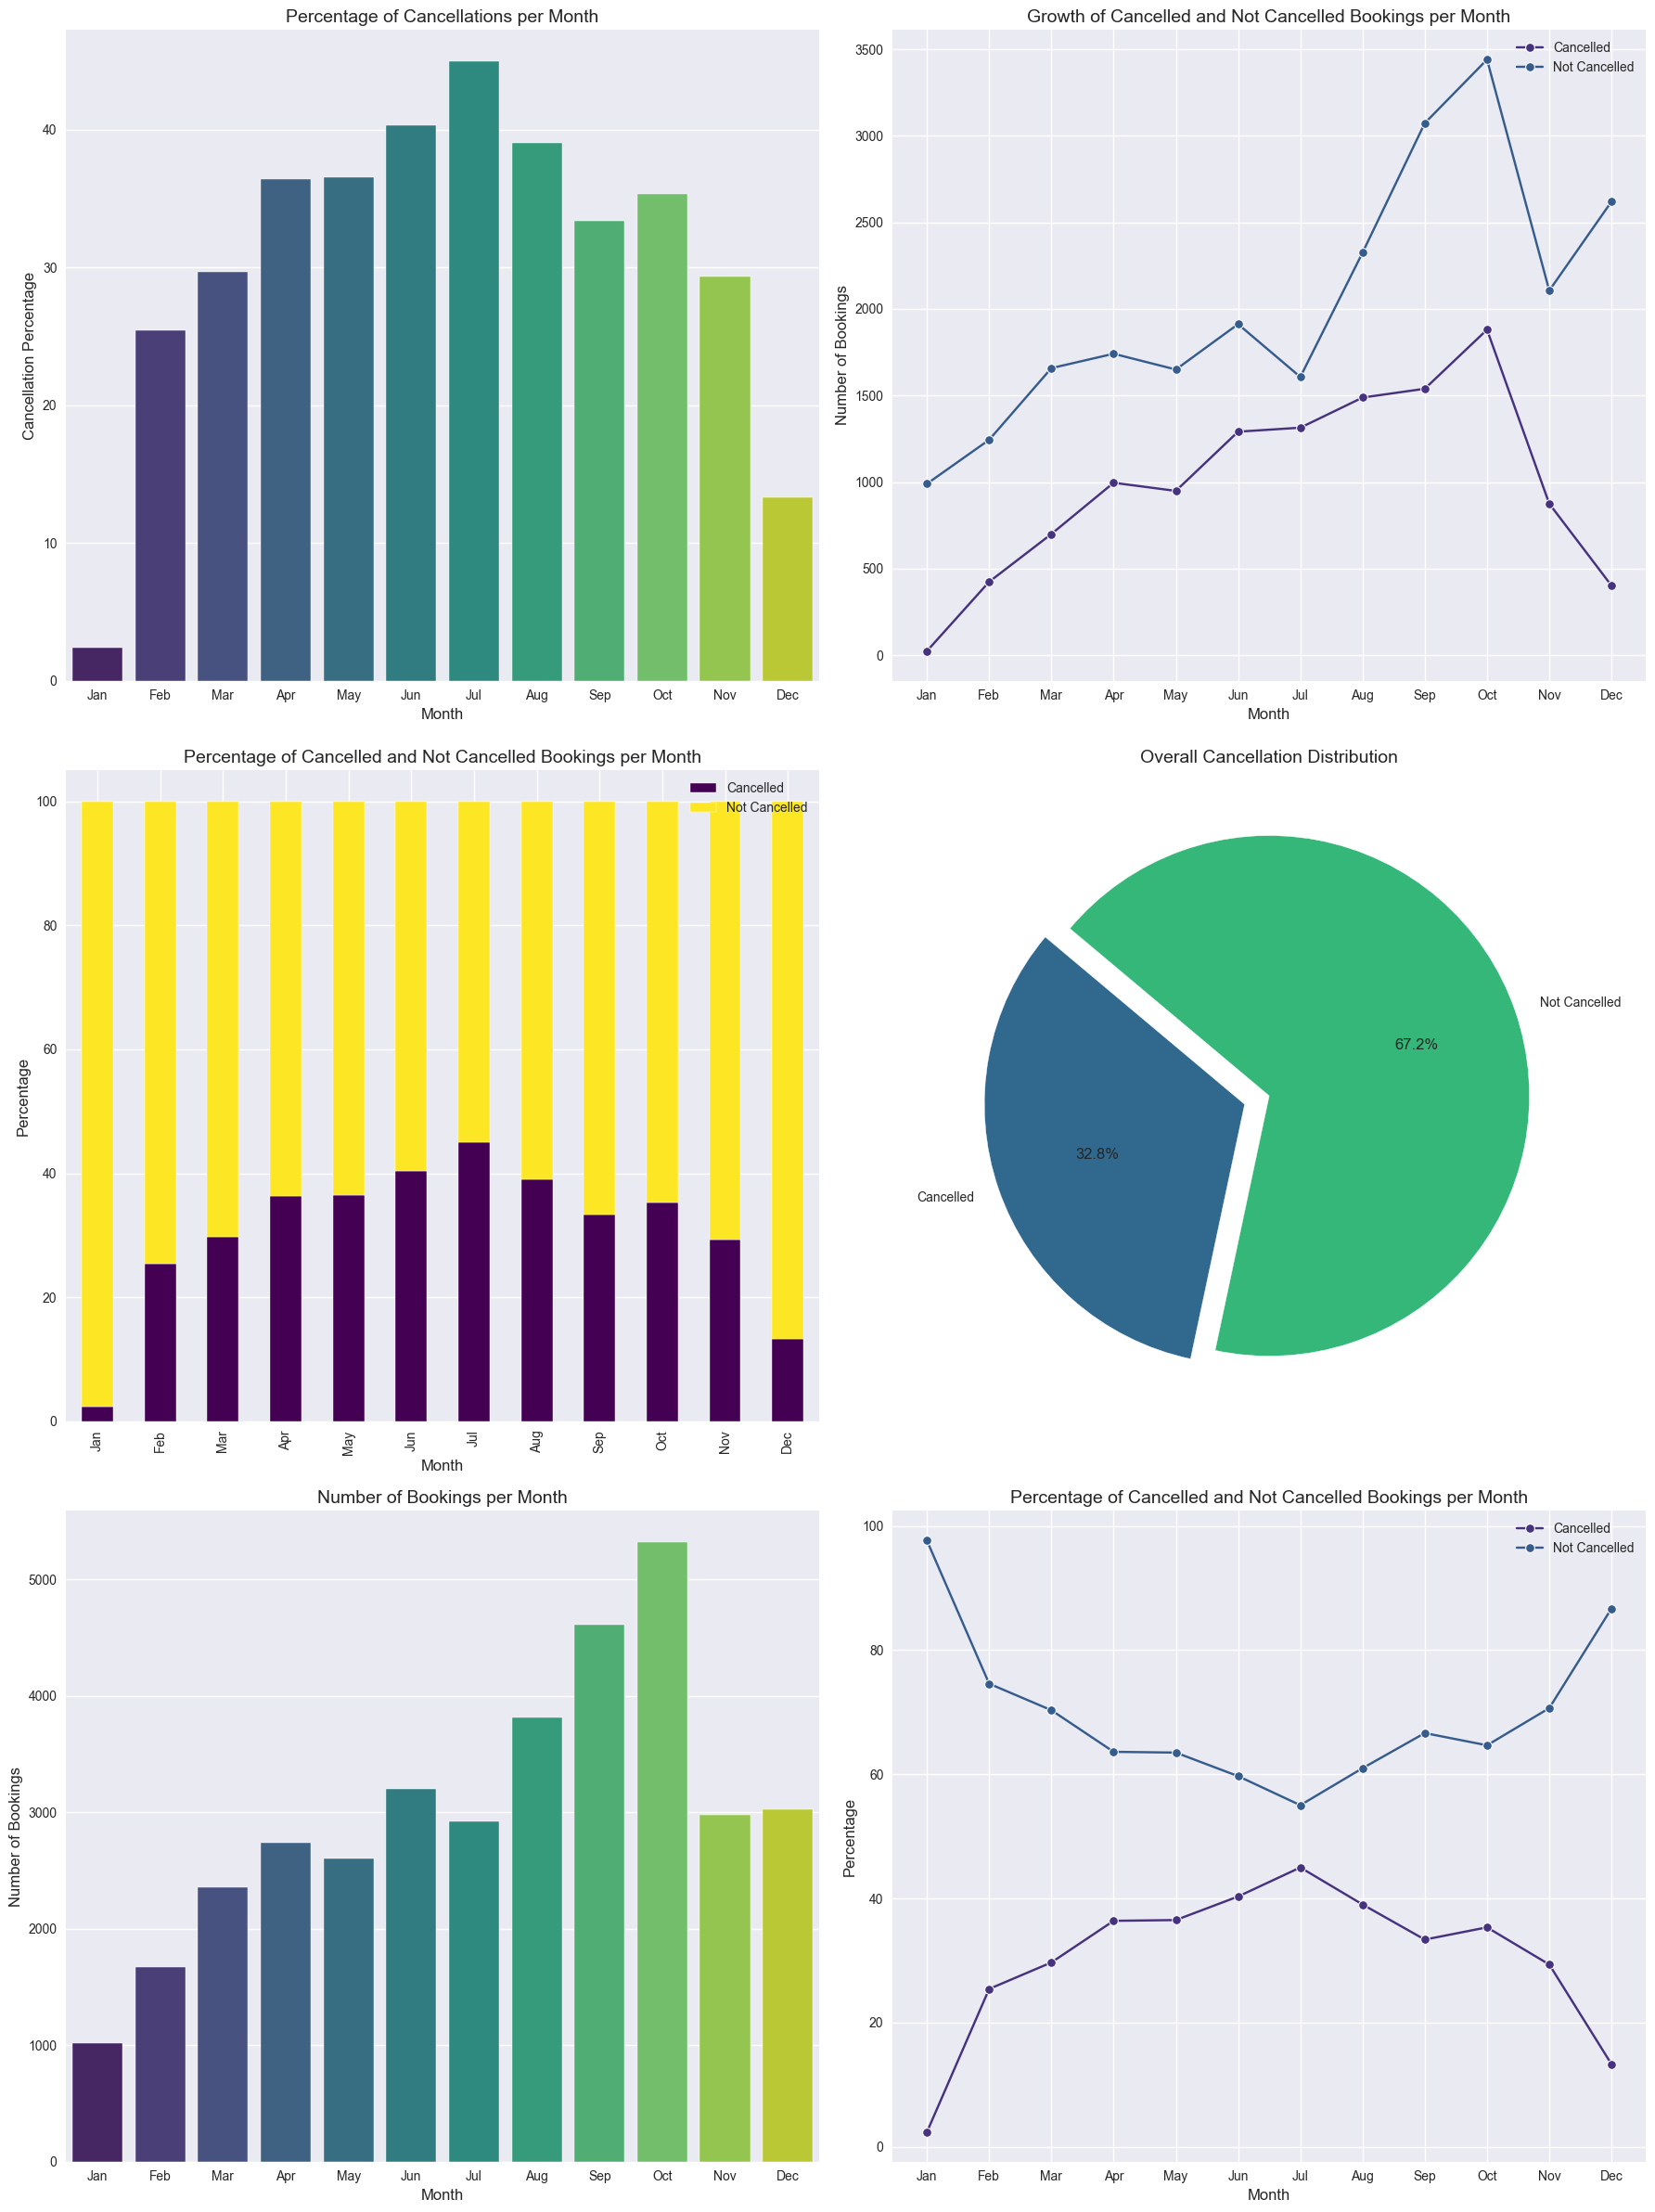

In [32]:
# Add a column for the month of reservation
data_cleaned['reservation_month'] = pd.to_datetime(data_cleaned['reservation_year'].astype(str) + '-' + data_cleaned['reservation_month'].astype(str) + '-01').dt.month

# Calculate cancelled and not cancelled bookings per month
monthly_cancelled = data_cleaned[data_cleaned['booking status'] == 0].groupby('reservation_month').size()
monthly_not_cancelled = data_cleaned[data_cleaned['booking status'] == 1].groupby('reservation_month').size()
monthly_reservations = data_cleaned.groupby('reservation_month').size()

# Calculate percentages
monthly_cancelled_percentage = (monthly_cancelled / monthly_reservations * 100)
monthly_not_cancelled_percentage = (monthly_not_cancelled / monthly_reservations * 100)

# Calculate total cancelled and not cancelled
total_cancelled = len(data_cleaned[data_cleaned['booking status'] == 0])
total_not_cancelled = len(data_cleaned[data_cleaned['booking status'] == 1])

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(18, 24))

# Plot 1: Percentage of cancellations per month
sns.barplot(ax=ax[0, 0], x=monthly_cancelled_percentage.index, y=monthly_cancelled_percentage.values, palette='viridis')
ax[0, 0].set_title('Percentage of Cancellations per Month')
ax[0, 0].set_xlabel('Month')
ax[0, 0].set_ylabel('Cancellation Percentage')
ax[0, 0].set_xticks(range(12))
ax[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot 2: Growth of cancelled and not cancelled bookings per month
sns.lineplot(ax=ax[0, 1], x=monthly_cancelled.index, y=monthly_cancelled.values, label='Cancelled', marker='o')
sns.lineplot(ax=ax[0, 1], x=monthly_not_cancelled.index, y=monthly_not_cancelled.values, label='Not Cancelled', marker='o')
ax[0, 1].set_title('Growth of Cancelled and Not Cancelled Bookings per Month')
ax[0, 1].set_xlabel('Month')
ax[0, 1].set_ylabel('Number of Bookings')
ax[0, 1].set_xticks(range(1, 13))
ax[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[0, 1].legend()

# Plot 3: Stacked percentage of cancelled and not cancelled bookings per month
monthly_data = pd.DataFrame({
    'Cancelled': monthly_cancelled_percentage,
    'Not Cancelled': monthly_not_cancelled_percentage
})
monthly_data.plot(kind='bar', stacked=True, ax=ax[1, 0], colormap='viridis')
ax[1, 0].set_title('Percentage of Cancelled and Not Cancelled Bookings per Month')
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_ylabel('Percentage')
ax[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot 4: Overall cancellation distribution (pie chart)
pie_data = [total_cancelled, total_not_cancelled]
pie_labels = ['Cancelled', 'Not Cancelled']
colors = sns.color_palette('viridis', len(pie_data))
ax[1, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0.1, 0])
ax[1, 1].set_title('Overall Cancellation Distribution')

# Plot 5: Number of bookings per month
sns.barplot(ax=ax[2, 0], x=monthly_reservations.index, y=monthly_reservations.values, palette='viridis')
ax[2, 0].set_title('Number of Bookings per Month')
ax[2, 0].set_xlabel('Month')
ax[2, 0].set_ylabel('Number of Bookings')
ax[2, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot 6: Percentage trends
sns.lineplot(ax=ax[2, 1], x=monthly_cancelled_percentage.index, y=monthly_cancelled_percentage.values, label='Cancelled', marker='o')
sns.lineplot(ax=ax[2, 1], x=monthly_not_cancelled_percentage.index, y=monthly_not_cancelled_percentage.values, label='Not Cancelled', marker='o')
ax[2, 1].set_title('Percentage of Cancelled and Not Cancelled Bookings per Month')
ax[2, 1].set_xlabel('Month')
ax[2, 1].set_ylabel('Percentage')
ax[2, 1].set_xticks(range(1, 13))
ax[2, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[2, 1].legend()

plt.tight_layout()
plt.show()


- Which Days , Months and years all prefer?

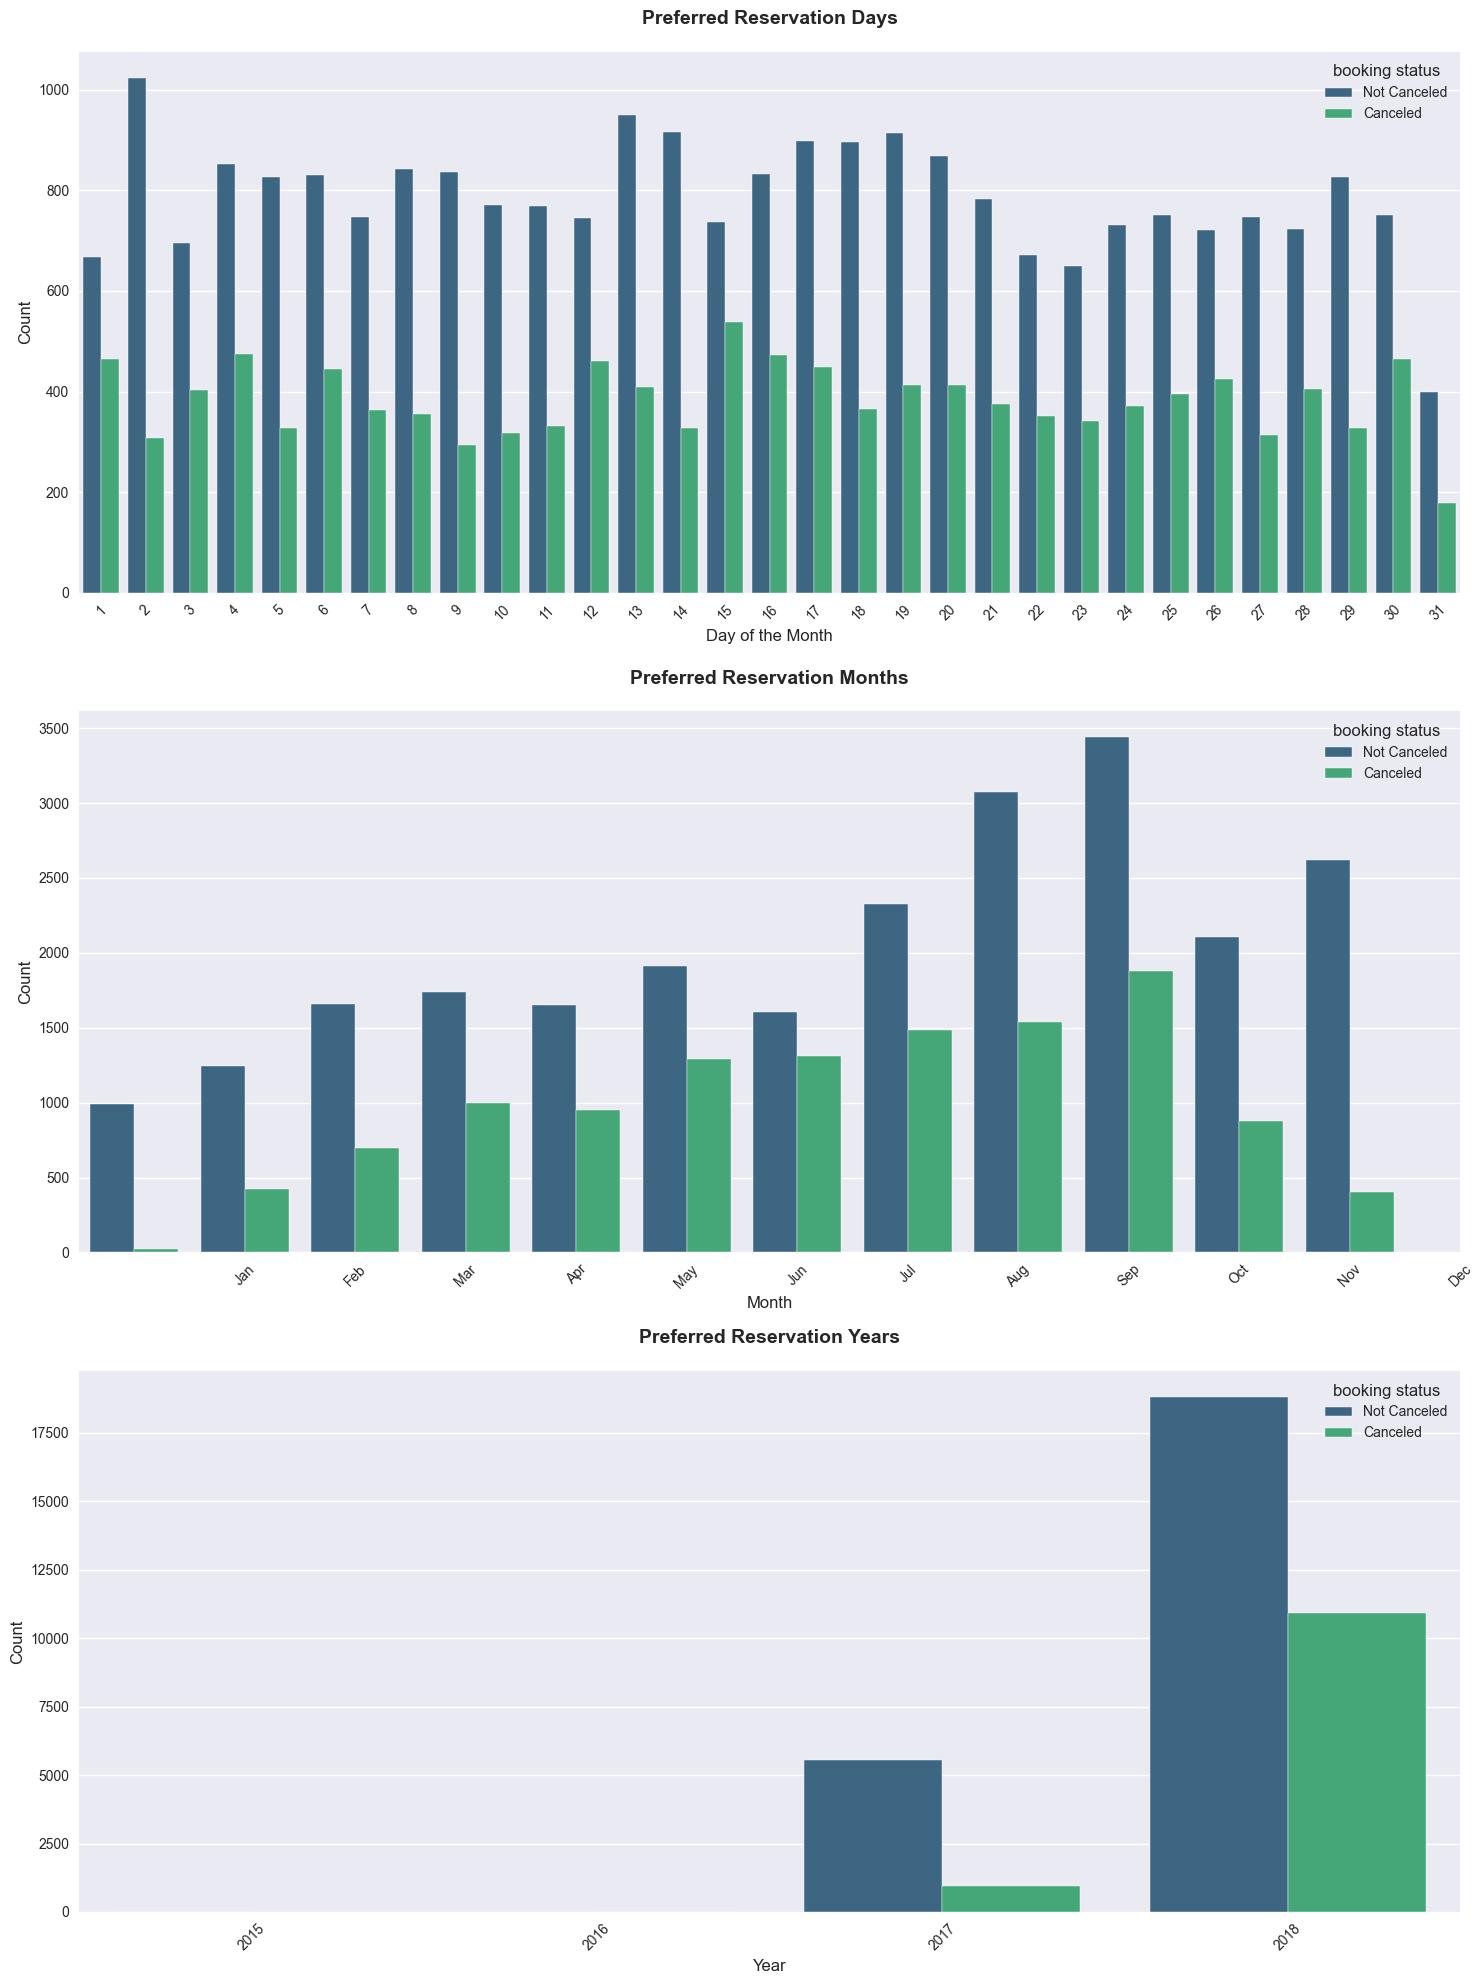

In [33]:
# Set the style and color palette
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Map booking status to text
data_cleaned['booking status'] = data_cleaned['booking status'].map({0: 'Canceled', 1: 'Not Canceled'})

# Create figure and subplots with adjusted spacing
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

# Plot 1: Preferred Days
sns.countplot(data=data_cleaned, x='reservation_day', hue='booking status', palette='viridis', ax=ax[0])
ax[0].set_title('Preferred Reservation Days', pad=20, fontweight='bold')
ax[0].set_xlabel('Day of the Month')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Preferred Months
sns.countplot(data=data_cleaned, x='reservation_month', hue='booking status', palette='viridis', ax=ax[1])
ax[1].set_title('Preferred Reservation Months', pad=20, fontweight='bold')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count')
ax[1].set_xticks(range(1, 13))
ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Plot 3: Preferred Years
sns.countplot(data=data_cleaned, x='reservation_year', hue='booking status', palette='viridis', ax=ax[2])
ax[2].set_title('Preferred Reservation Years', pad=20, fontweight='bold')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Count')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- How do car parking spaces influence the likelihood of a booking being canceled or not?

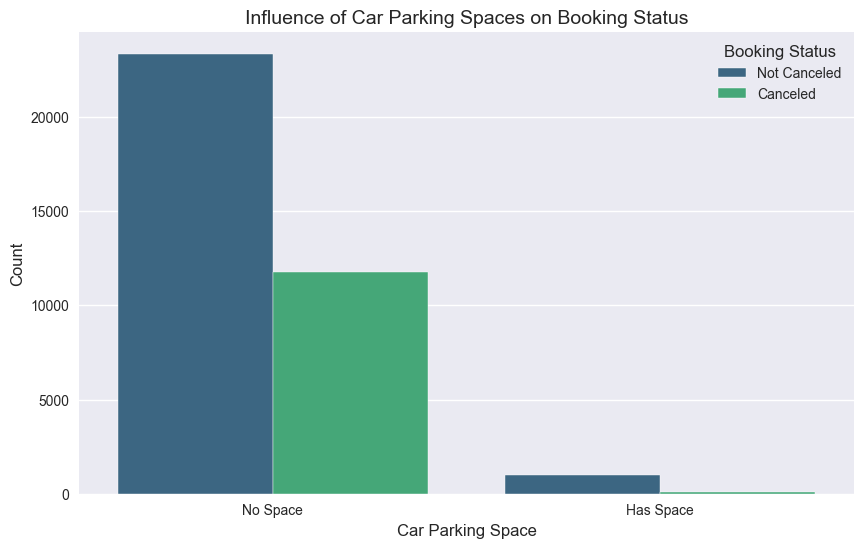

In [34]:
# Map the values of the car parking space column
data_cleaned['car parking space'] = data_cleaned['car parking space'].map({0: 'No Space', 1: 'Has Space'})

# Plot the influence of car parking spaces on booking status
plt.figure(figsize=(10, 6))
sns.countplot(x='car parking space', data=data_cleaned, hue='booking status', palette='viridis')
plt.title('Influence of Car Parking Spaces on Booking Status')
plt.xlabel('Car Parking Space')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

- How many of our customers are old customers? How many have special requests?

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\405295876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Old Customer', data=data_cleaned, palette='viridis')
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\405295876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='special requests', data=data_cleaned, palette='viridis')


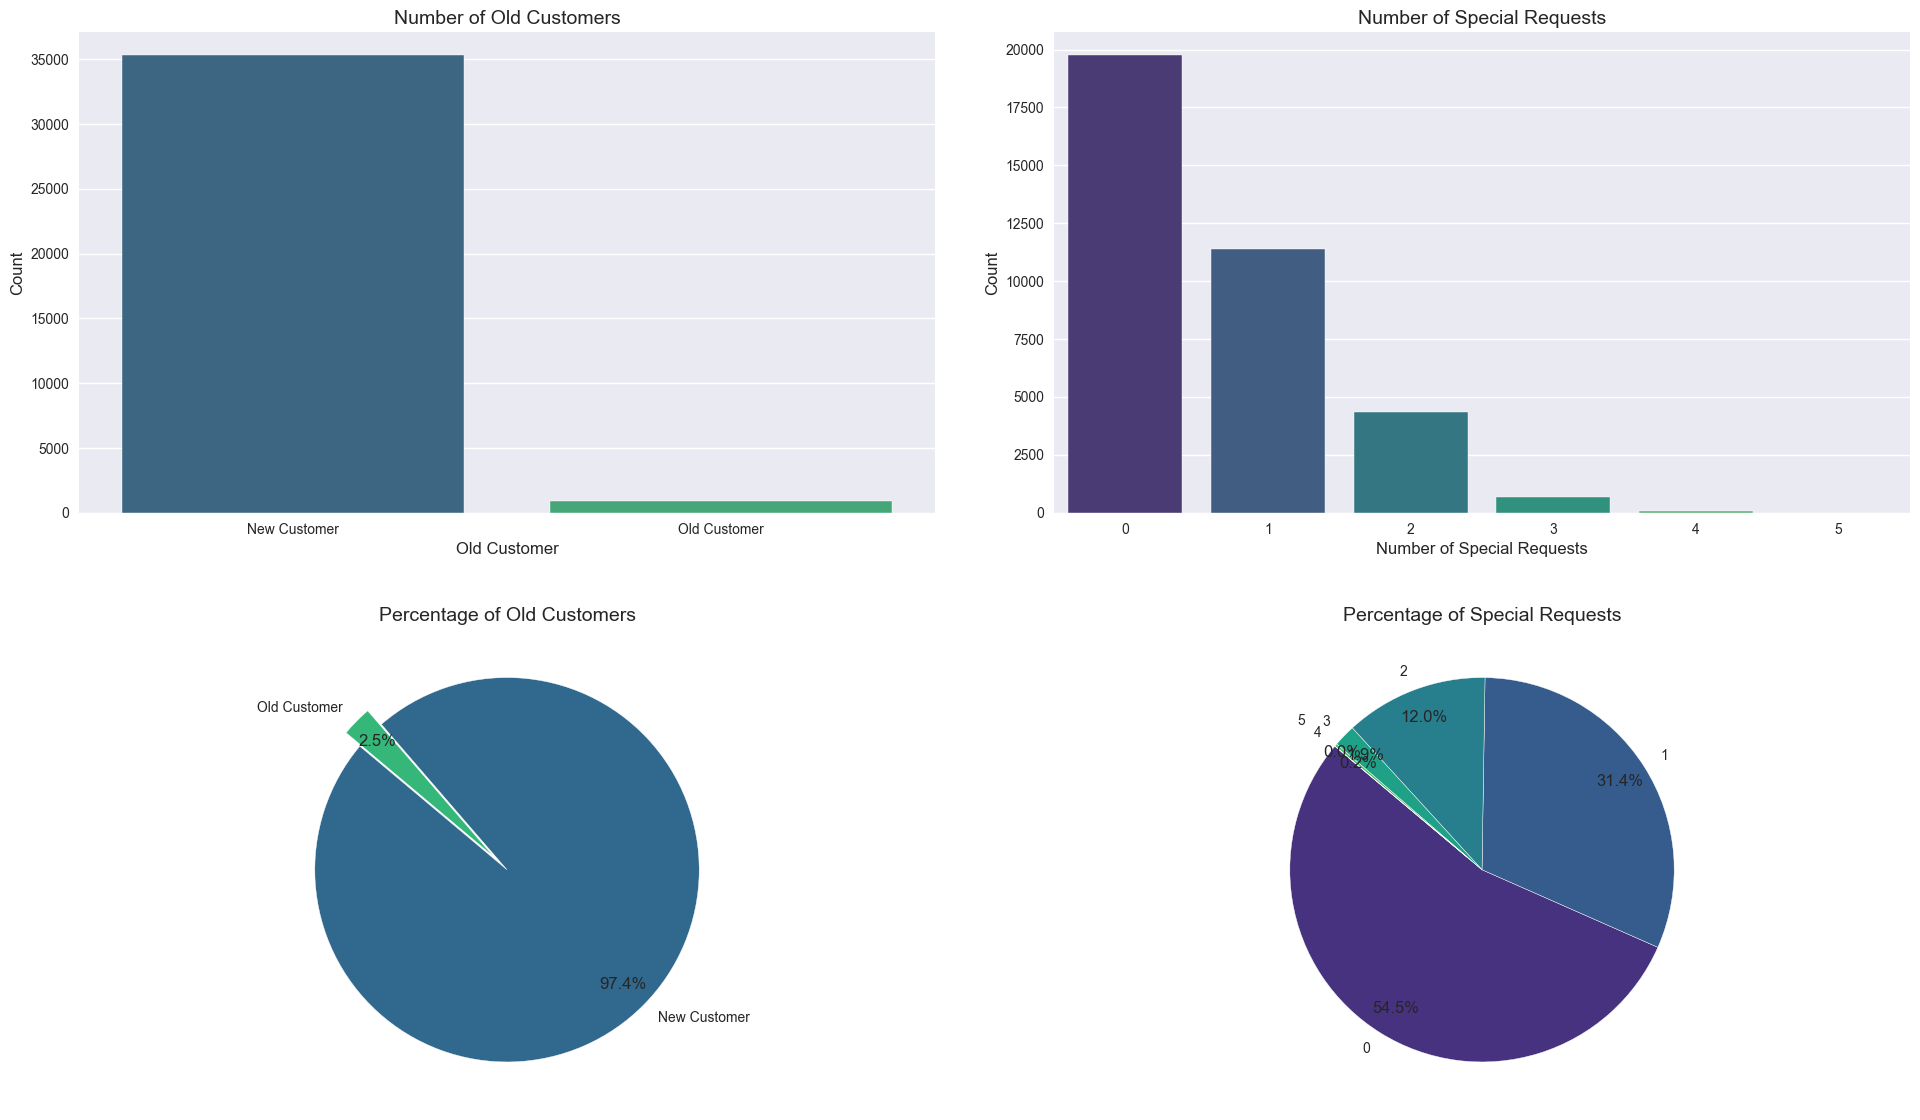

In [35]:
# Plot the number of old customers and customers with special requests
plt.figure(figsize=(20, 12))

# Plot 1: Number of Old Customers (Bar Plot)
plt.subplot(2, 2, 1)
sns.countplot(x='Old Customer', data=data_cleaned, palette='viridis')
plt.title('Number of Old Customers')
plt.xlabel('Old Customer')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['New Customer', 'Old Customer'])

# Plot 2: Number of Special Requests (Bar Plot)
plt.subplot(2, 2, 2)
sns.countplot(x='special requests', data=data_cleaned, palette='viridis')
plt.title('Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')

# Plot 3: Percentage of Old Customers (Pie Chart)
plt.subplot(2, 2, 3)
old_customer_counts = data_cleaned['Old Customer'].value_counts()
old_customer_percentages = (old_customer_counts / len(data_cleaned) * 100).round(2)
colors = sns.color_palette('viridis', n_colors=len(old_customer_counts))
explode = [0.1 if i == old_customer_percentages.idxmin() else 0 for i in old_customer_percentages.index]
plt.pie(old_customer_percentages, labels=['New Customer', 'Old Customer'], autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, pctdistance=0.85)
plt.title('Percentage of Old Customers')

# Plot 4: Percentage of Special Requests (Pie Chart)
plt.subplot(2, 2, 4)
special_requests_counts = data_cleaned['special requests'].value_counts()
special_requests_percentages = (special_requests_counts / len(data_cleaned) * 100).round(2)
colors = sns.color_palette('viridis', n_colors=len(special_requests_counts))
explode = [0.1 if i == special_requests_percentages.idxmin() else 0 for i in special_requests_percentages.index]
plt.pie(special_requests_percentages, labels=special_requests_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, pctdistance=0.85)
plt.title('Percentage of Special Requests')

plt.tight_layout(pad=3.0)
plt.show()

- Growth Curve Analysis

Analyzing the growth patterns across different dimensions:

1. **Booking Growth by Month**
    - Monthly booking trends and seasonality
    - Cancellation rates over time
    - Peak booking periods

2. **Market Segment Growth**
    - Distribution across different segments
    - Segment-wise booking patterns
    - Revenue growth by segment

3. **Room Type Utilization**
    - Occupancy rates over time
    - Room type preferences
    - Price vs. demand correlation

4. **Customer Base Growth**
    - New vs. returning customers
    - Customer loyalty trends
    - Market segment retention

C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\1701031212.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_copy, x='room type', y='average price', hue='booking status',
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\1701031212.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_copy, x='market segment type', y='average price',
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\1701031212.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_copy, x='market segment type', y='average price',
C:\Users\OmarMamon\AppData\Local\Temp\ipykernel_36828\1701031212.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

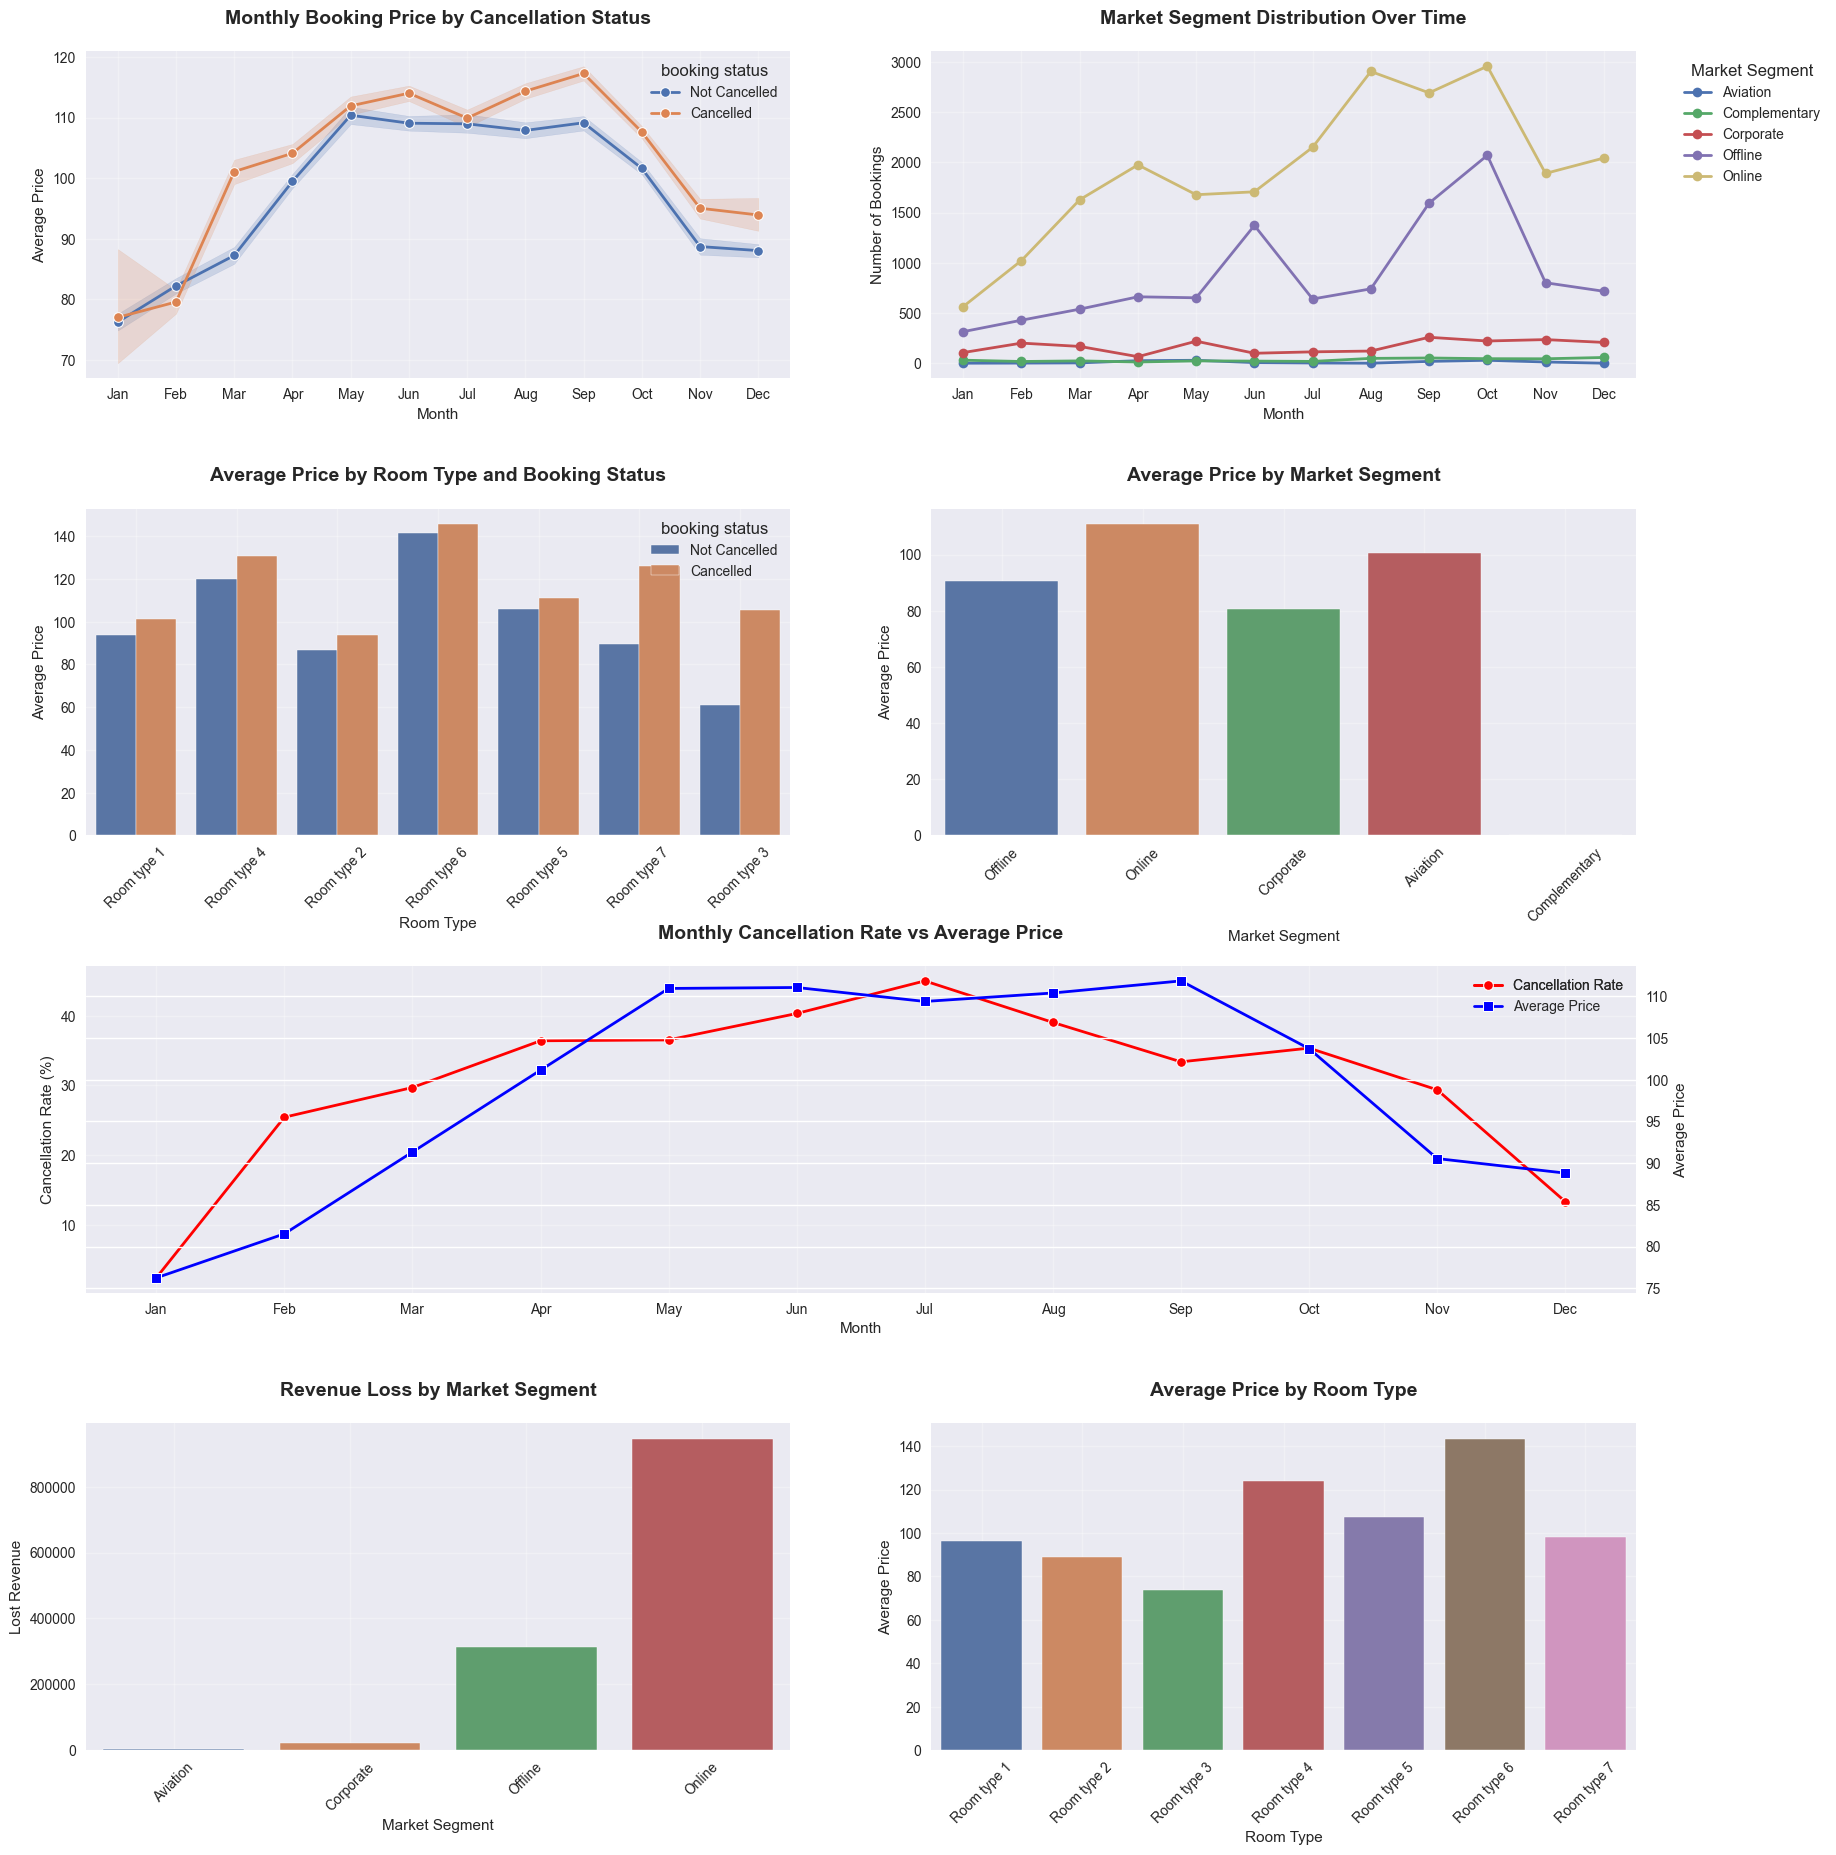

In [36]:
# Set style and figure size
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (20, 28)

# Create subplots with adjusted spacing
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(5, 2, hspace=0.4)

# Map encoded values back to strings
data_copy['booking status'] = data_copy['booking status'].map({0: 'Cancelled', 1: 'Not Cancelled'})
data_copy['market segment type'] = data_copy['market segment type'].map(market_segment_mapping)
data_copy['room type'] = data_copy['room type'].map(Room_mapping)

# Plot 1: Monthly Booking Growth with Cancellation Status
ax1 = fig.add_subplot(gs[0, 0])
sns.lineplot(data=data_copy, x='reservation_month', y='average price', 
             hue='booking status', marker='o', palette='deep', linewidth=2, ax=ax1)
ax1.set_title('Monthly Booking Price by Cancellation Status', pad=20, fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price')
ax1.set_xticks(range(1,13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.grid(True, alpha=0.3)

# Plot 2: Market Segment Distribution
ax2 = fig.add_subplot(gs[0, 1])
market_counts = data_copy.groupby(['reservation_month', 'market segment type']).size().unstack(fill_value=0)
market_counts.plot(kind='line', marker='o', ax=ax2, linewidth=2)
ax2.set_title('Market Segment Distribution Over Time', pad=20, fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Bookings')
ax2.legend(title='Market Segment', bbox_to_anchor=(1.05, 1))
ax2.set_xticks(range(1,13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.grid(True, alpha=0.3)

# Plot 3: Room Type Distribution by Booking Status
ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(data=data_copy, x='room type', y='average price', hue='booking status', 
           palette='deep', ci=None, ax=ax3)
ax3.set_title('Average Price by Room Type and Booking Status', pad=20, fontsize=14, fontweight='bold')
ax3.set_xlabel('Room Type')
ax3.set_ylabel('Average Price')
plt.xticks(rotation=45)
ax3.grid(True, alpha=0.3)

# Plot 4: Market Segment Average Price
ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(data=data_copy, x='market segment type', y='average price', 
           palette='deep', ci=None, ax=ax4)
ax4.set_title('Average Price by Market Segment', pad=20, fontsize=14, fontweight='bold')
ax4.set_xlabel('Market Segment')
ax4.set_ylabel('Average Price')
plt.xticks(rotation=45)
ax4.grid(True, alpha=0.3)

# Plot 5: Monthly Cancellation Rate and Average Price
ax5 = fig.add_subplot(gs[2, :])
monthly_stats = data_copy.groupby('reservation_month').agg({
    'booking status': lambda x: (x == 'Cancelled').mean() * 100,
    'average price': 'mean'
}).reset_index()

ax5_twin = ax5.twinx()
sns.lineplot(data=monthly_stats, x='reservation_month', y='booking status', 
             color='red', marker='o', label='Cancellation Rate', ax=ax5, linewidth=2)
sns.lineplot(data=monthly_stats, x='reservation_month', y='average price', 
             color='blue', marker='s', label='Average Price', ax=ax5_twin, linewidth=2)

ax5.set_title('Monthly Cancellation Rate vs Average Price', pad=20, fontsize=14, fontweight='bold')
ax5.set_xlabel('Month')
ax5.set_ylabel('Cancellation Rate (%)')
ax5_twin.set_ylabel('Average Price')
ax5.set_xticks(range(1,13))
ax5.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax5.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax5.get_legend_handles_labels()
lines2, labels2 = ax5_twin.get_legend_handles_labels()
ax5_twin.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Plot 6: Revenue Loss by Market Segment
ax6 = fig.add_subplot(gs[3, 0])
revenue_loss = data_copy[data_copy['booking status'] == 'Cancelled'].groupby('market segment type')['average price'].sum()
sns.barplot(x=revenue_loss.index, y=revenue_loss.values, palette='deep', ax=ax6)
ax6.set_title('Revenue Loss by Market Segment', pad=20, fontsize=14, fontweight='bold')
ax6.set_xlabel('Market Segment')
ax6.set_ylabel('Lost Revenue')
plt.xticks(rotation=45)
ax6.grid(True, alpha=0.3)

# Plot 7: Average Price by Room Type
ax7 = fig.add_subplot(gs[3, 1])
room_profit = data_copy.groupby('room type')['average price'].mean()
sns.barplot(x=room_profit.index, y=room_profit.values, palette='deep', ax=ax7)
ax7.set_title('Average Price by Room Type', pad=20, fontsize=14, fontweight='bold')
ax7.set_xlabel('Room Type')
ax7.set_ylabel('Average Price')
plt.xticks(rotation=45)
ax7.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Hotel Booking Status Analysis & Prediction
---


### Identify Features and Target

In this section, we will identify the features (independent variables) and the target (dependent variable) for our machine learning models. 

- **Features**: These are the variables that will be used to predict the target. In our case, the features include:
    - Number of Adults
    - Number of Children
    - Number of Weekend Nights
    - Number of Week Nights
    - Type of Meal
    - Room Type
    - Lead Time
    - Market Segment Type
    - Old Customer
    - Previously Canceled
    - Average Price
    - Special Requests
    - Reservation Year
    - Total Nights

- **Target**: This is the variable that we want to predict. In our case, the target is the `Booking Status`.

We will use these identified features and target to train and evaluate our machine learning models.

In [37]:
booking_status = data_cleaned.copy()

# Keep lead time, special requests, reservation_year, average price, market segment type, Old Customer and total nights
# Drop the rest of the columns
booking_status.drop([ 'car parking space', 'Previously not Canceled', 'reservation_month', 'reservation_day'], axis=1, inplace=True)

# Display the first few rows of the encoded dataframe
booking_status.head()


number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  type of meal  room type  lead time  \
0                      5             0          0   85.28236   
1                      3             3          0    5.00000   
2                      3             0          0    1.00000   
3                      2             0          0   85.28236   
4                      2             3          0   48.00000   

   market segment type  Old Customer  Previously Canceled  average price  \
0                    3             0                    0          88.00   
1                    4             0                    0         106.68   
2                    4             0                    0          50.00   
3                    4             0                    0         100.00   
4                    4             0                    0          77.00   

   special requests booking status  reservation_year  total nights  
0                 0   Not Canceled              2015             7  
1                 1   Not Canceled              2018             4  
2                 0       Canceled              2018             4  
3                 1       Canceled              2017             2  
4                 0       Canceled              2018             3

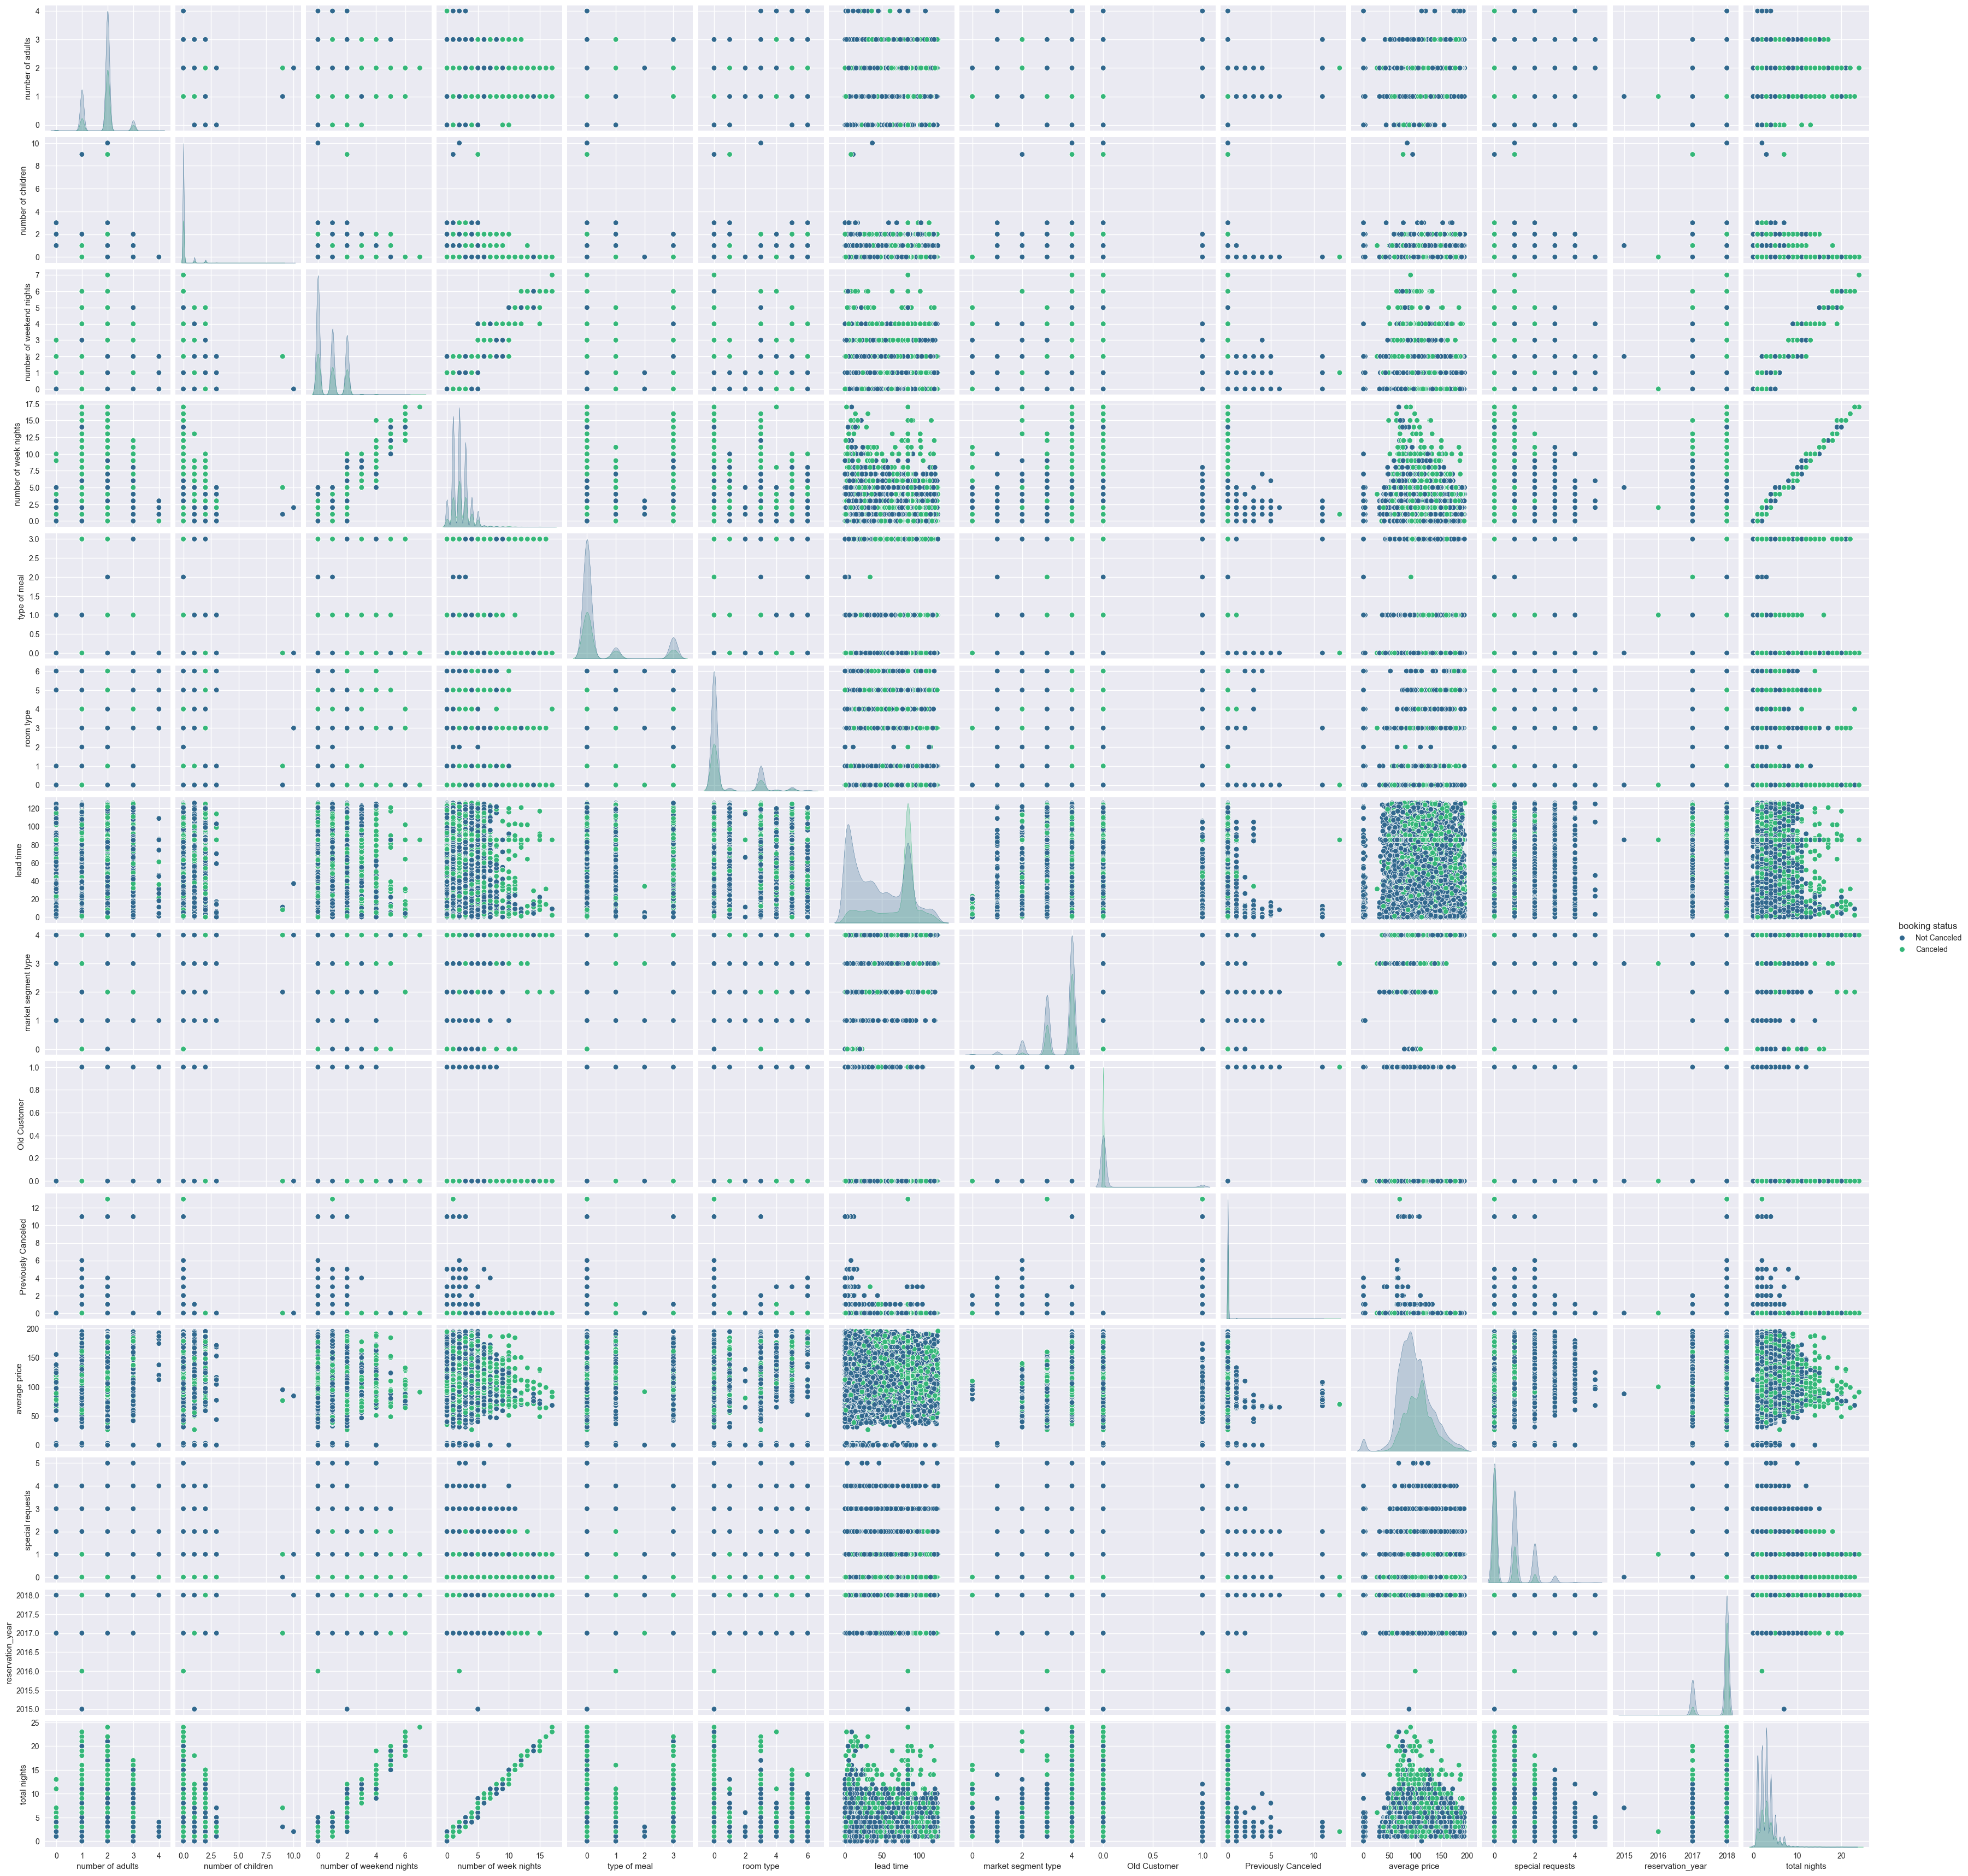

In [38]:
# Pairplot of the selected columns
sns.pairplot(booking_status, hue='booking status', palette='viridis')
plt.show()

### Observations from the Pairplot Analysis

Based on the pairplot visualization, we can observe:

1. **Non-linear Relationships**: The scatter plots show predominantly non-linear relationships between variables, suggesting that linear regression might not be the optimal choice for modeling.

2. **Distribution Patterns**:
    - Most features exhibit non-normal distributions
    - Several features show clustered patterns
    - There's significant overlap between canceled and not-canceled bookings

3. **Feature Correlations**:
    - Lead time and average price show complex, non-linear relationships with booking status
    - Special requests and total nights display distinct clustering patterns
    - Market segment type shows clear segmentation in relation to other features

4. **Model Implications**:
    - Non-linear algorithms like Random Forest or XGBoost might perform better than linear models
    - Feature engineering may be necessary to capture complex relationships
    - Ensemble methods could help handle the complex decision boundaries

---

### Modeling

We will build and evaluate different machine learning models to predict the booking status:

1. **K-Nearest Neighbors (KNN)**
2. **Logistic Regression** 
3. **Random forest**
4. **Xgboost**
5. **SVM**

We will compare the performance of these models based on their accuracy. The model with the highest accuracy will be selected as the best model for predicting the booking status.
The following code block demonstrates the comparison:


In [39]:
# start training the model
X = booking_status.drop('booking status', axis=1)   # Features
y = booking_status['booking status']    # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y , shuffle=True) 

In [40]:
# Check if data is balanced or not
y_train.value_counts()

booking status
Not Canceled    19493
Canceled         9505
Name: count, dtype: int64

### Data Balance Analysis

The analysis of our training data shows an imbalanced distribution in the booking status:

- Not Canceled: 19,493 records (67.2%)
- Canceled: 9,505 records (32.8%)

This imbalance needs to be considered when evaluating model performance, as it may affect the model's ability to predict cancellations accurately. The models should be evaluated using metrics that account for class imbalance, such as F1-score and precision-recall, rather than accuracy alone.

---
- SMOTE (Synthetic Minority Over-sampling Technique) works by creating synthetic samples of the minority class by interpolating between existing minority class samples.
- Over Sampling: Creates synthetic samples of the minority class to balance the dataset
- Under Sampling: Reduces samples from the majority class to match the minority class

In [41]:
# Fix the imbalanced data using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Check if data is balanced or not
y_train.value_counts()

booking status
Not Canceled    19493
Canceled        19493
Name: count, dtype: int64

### Data Balance After SMOTE

After applying SMOTE (Synthetic Minority Over-sampling Technique), our dataset is now perfectly balanced:

- Canceled: 19,493 records (50%)
- Not Canceled: 19,493 records (50%)

This balanced distribution will help prevent bias in our model training and lead to more reliable predictions for both canceled and not canceled bookings.


- Scaling

In [42]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Model Selection

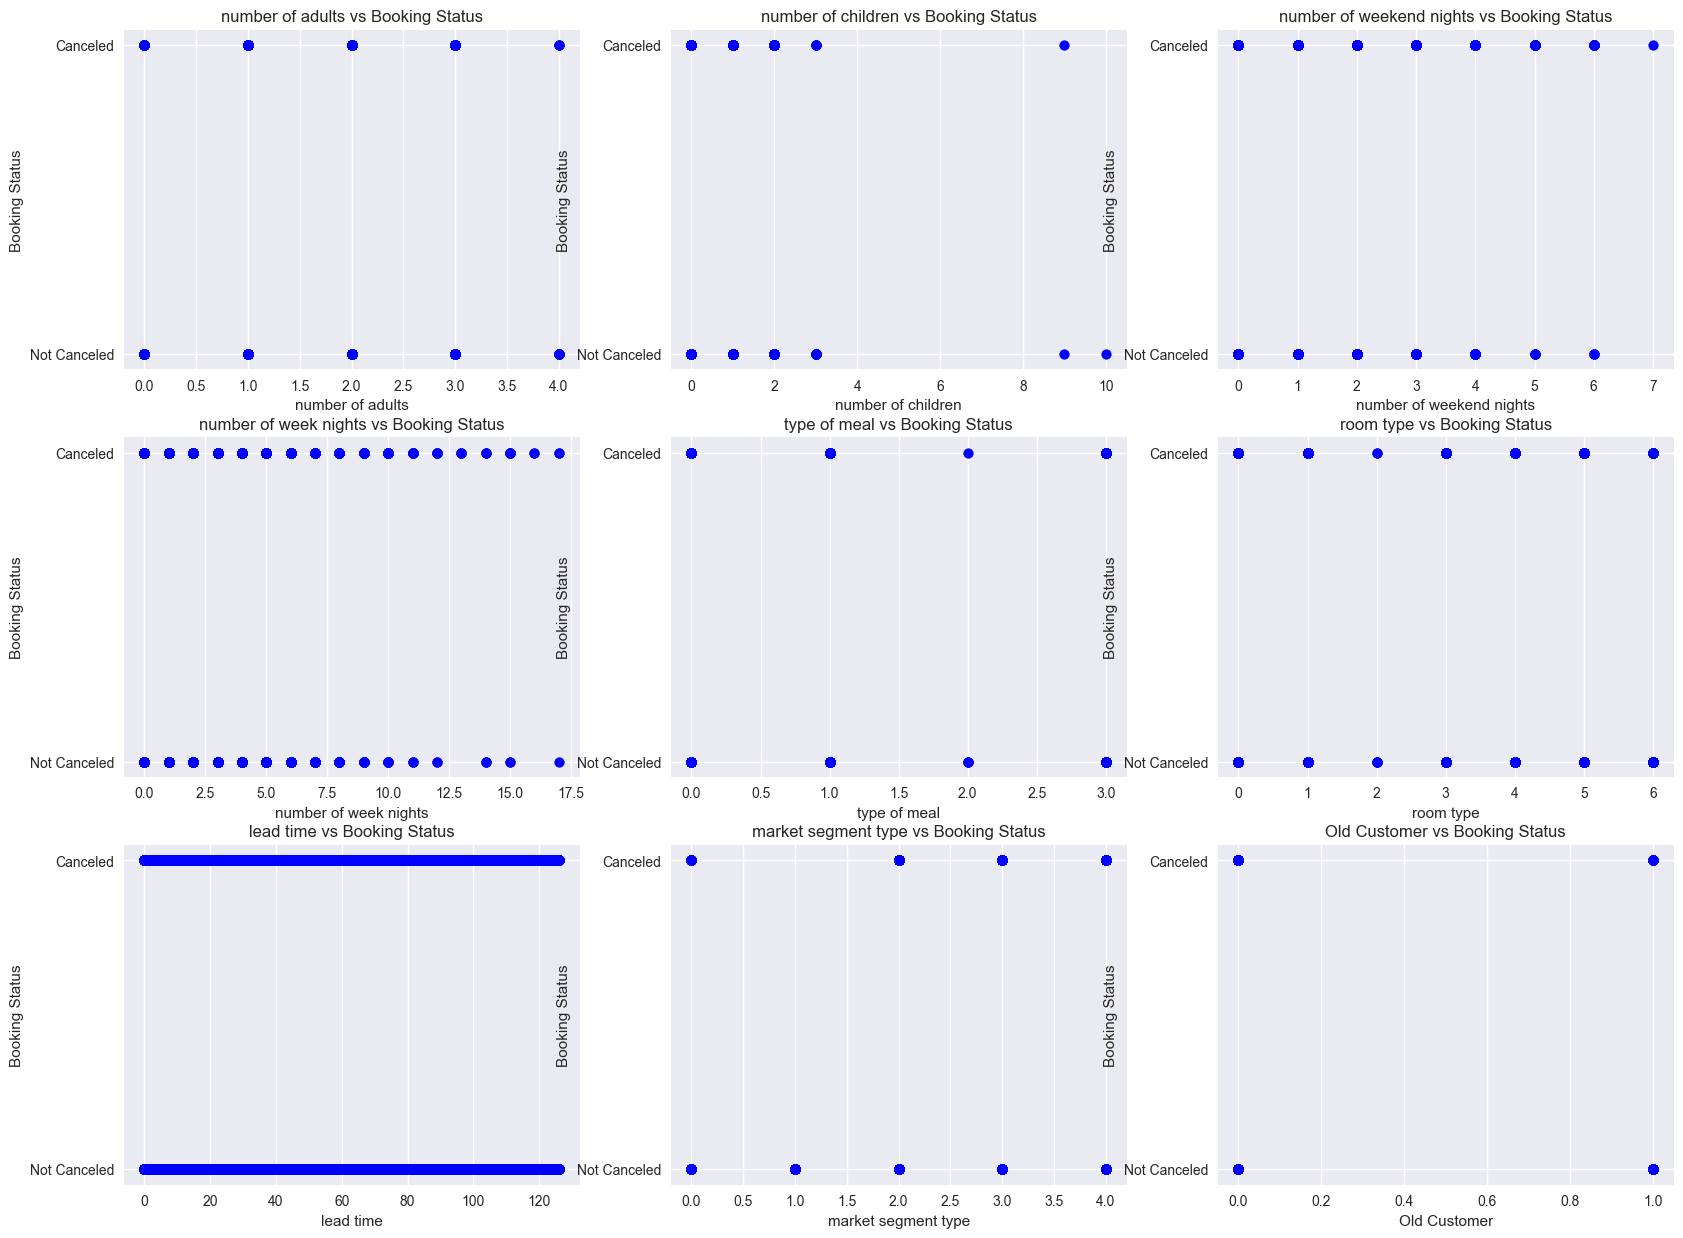

In [43]:
# make scatter plot for each of x and y each col of x with y
plt.figure(figsize=(20, 15))
for i in range(min(X.shape[1], 9)):  # Ensure we do not exceed 9 subplots
    plt.subplot(3, 3, i + 1)
    plt.scatter(X.iloc[:, i], y, color='blue')
    plt.xlabel(X.columns[i])
    plt.ylabel('Booking Status')
    plt.title(f'{X.columns[i]} vs Booking Status')

### Fitting and Evaluating the 'KNN' Model

In this section, we will fit the K-Nearest Neighbors (KNN) model to our training data and evaluate its performance on the test data. The KNN algorithm is a simple, yet powerful classification method that assigns a class to a sample based on the majority class of its k-nearest neighbors.

Steps:
1. **Model Initialization**: Initialize the KNN model with the desired number of neighbors.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy and F1 score metrics.

The following code block demonstrates these steps:

The optimal k value is: 5


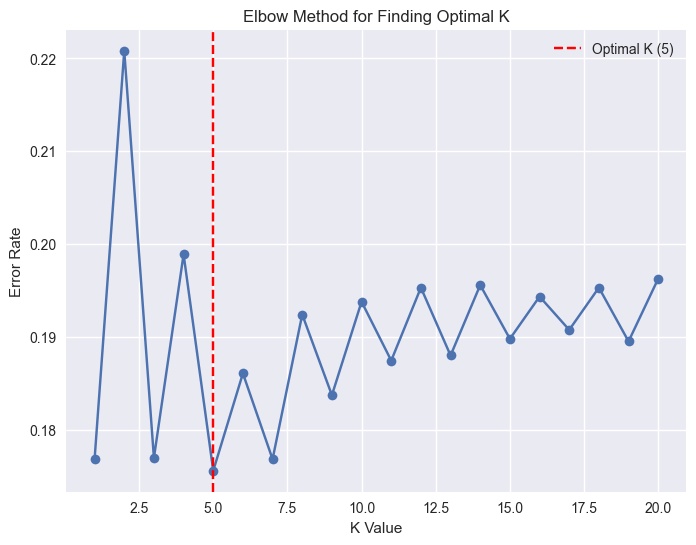

In [44]:
# Find the optimal k value using the elbow method
k_values = range(1, 21)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Find the optimal k value
optimal_k = k_values[error_rates.index(min(error_rates))]
print(f"The optimal k value is: {optimal_k}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f"Optimal K ({optimal_k})")
plt.legend()
plt.show()


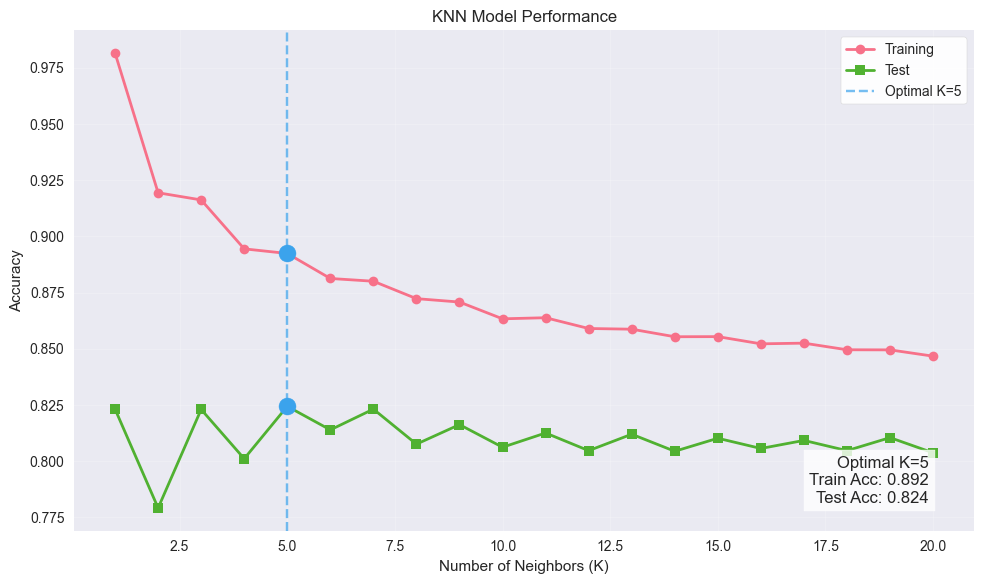

In [45]:
# Set style and palette
plt.style.use('seaborn-v0_8')
palette = sns.color_palette('husl', 3)

# Convert y_train to numpy array once
y_train_np = y_train.to_numpy()

# Training loop
neighbors_set = range(1, 21)
training_acc = [KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train_np).score(X_train, y_train) for n in neighbors_set]
test_acc = [KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train_np).score(X_test, y_test) for n in neighbors_set]
optimal_k = neighbors_set[np.argmax(test_acc)]

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracies
ax.plot(neighbors_set, training_acc, color=palette[0], marker='o', label='Training', linewidth=2)
ax.plot(neighbors_set, test_acc, color=palette[1], marker='s', label='Test', linewidth=2)
ax.axvline(optimal_k, color=palette[2], linestyle='--', alpha=0.7, label=f'Optimal K={optimal_k}')

# Add optimal points
ax.scatter(optimal_k, training_acc[optimal_k - 1], color=palette[2], s=150, zorder=5)
ax.scatter(optimal_k, test_acc[optimal_k - 1], color=palette[2], s=150, zorder=5)

# Styling
ax.set(xlabel='Number of Neighbors (K)', 
       ylabel='Accuracy',
       title='KNN Model Performance')
ax.grid(alpha=0.2)
ax.legend(frameon=True, facecolor='white', framealpha=0.95)

# Add metrics textbox
textstr = f'Optimal K={optimal_k}\nTrain Acc: {training_acc[optimal_k - 1]:.3f}\nTest Acc: {test_acc[optimal_k - 1]:.3f}'
ax.text(0.95, 0.05, textstr, transform=ax.transAxes, 
        bbox=dict(facecolor='white', alpha=0.8),
        ha='right', va='bottom')

plt.tight_layout()
plt.show()

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred_knn = knn.predict(X_test)

In [49]:
# evaluate the model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, pos_label='Canceled')
precision_knn = precision_score(y_test, y_pred_knn, pos_label='Canceled')
recall_knn = recall_score(y_test, y_pred_knn, pos_label='Canceled')

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_knn:.3f}")
print(f"F1 Score:  {f1_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall:    {recall_knn:.3f}")



Model Evaluation Metrics:
-------------------------
Accuracy:  0.824
F1 Score:  0.748
Precision: 0.707
Recall:    0.793


In [50]:
knn_report = classification_report(y_test, y_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

    Canceled       0.71      0.79      0.75      2377
Not Canceled       0.89      0.84      0.87      4873

    accuracy                           0.82      7250
   macro avg       0.80      0.82      0.81      7250
weighted avg       0.83      0.82      0.83      7250



### Fitting and Evaluating the 'Logistic Regression' Model

In this section, we will fit the Logistic Regression model to our training data and evaluate its performance on the test data. Logistic Regression is a linear model commonly used for binary classification tasks.

Steps:
1. **Model Initialization**: Initialize the Logistic Regression model.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy and F1 score metrics.

The following code block demonstrates these steps:

In [51]:
log_reg = LogisticRegression()

In [52]:
# Cross validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.73890741 0.74900603 0.75900988 0.78812364 0.78081313]
Mean CV Score: 0.7631720172524777


In [53]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred_logReg = log_reg.predict(X_test)

In [55]:
# evaluate the model performance
accuracy_log_reg = accuracy_score(y_test, y_pred_logReg)
f1_log_reg = f1_score(y_test, y_pred_logReg, pos_label='Canceled')
precision_log_reg = precision_score(y_test, y_pred_logReg, pos_label='Canceled')
recall_log_reg = recall_score(y_test, y_pred_logReg, pos_label='Canceled')

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_log_reg:.3f}")
print(f"F1 Score:  {f1_log_reg:.3f}")
print(f"Precision: {precision_log_reg:.3f}")
print(f"Recall:    {recall_log_reg:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.735
F1 Score:  0.647
Precision: 0.574
Recall:    0.740


In [56]:
log_report = classification_report(y_test, y_pred_logReg)
print(log_report)

              precision    recall  f1-score   support

    Canceled       0.57      0.74      0.65      2377
Not Canceled       0.85      0.73      0.79      4873

    accuracy                           0.73      7250
   macro avg       0.71      0.74      0.72      7250
weighted avg       0.76      0.73      0.74      7250



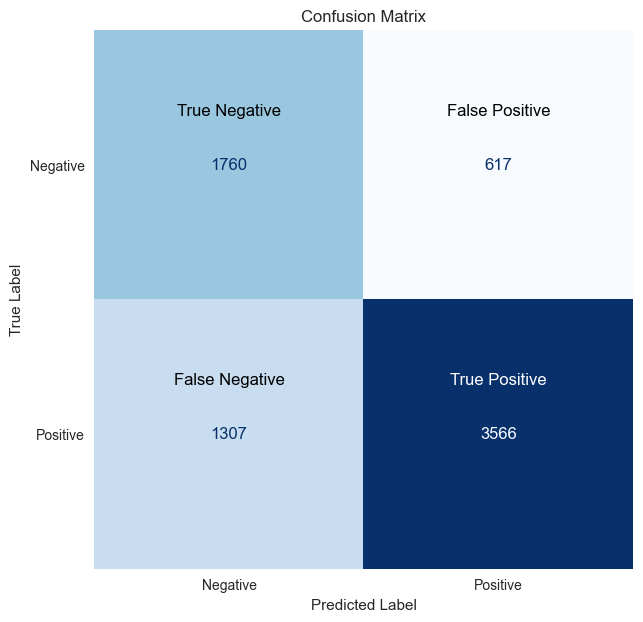

In [57]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logReg)

# Display confusion matrix with enhanced colors and labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(cmap='Blues', ax=ax, colorbar=False)
plt.grid(False)  # Remove grid lines
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate the squares with the counts and labels at the top
labels = np.array([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        plt.text(j, i - 0.2, f'{labels[i, j]}', ha='center', va='center', color=color, fontsize=12)

plt.show()

### Fitting and Evaluating the 'Random Forest' Model

In this section, we will fit the Random Forest model to our training data and evaluate its performance on the test data. Random Forest is an ensemble learning method that constructs multiple decision trees and merges them to get a more accurate and stable prediction.

#### How Random Forest Works

Random Forest is a versatile machine learning algorithm capable of performing both regression and classification tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Key steps in the Random Forest algorithm:
1. **Bootstrap Sampling**: Random subsets of the training data are created with replacement.
2. **Decision Tree Construction**: For each subset, a decision tree is built using a random subset of features at each split.
3. **Aggregation**: The predictions of all the trees are aggregated to produce the final prediction. For classification, the majority vote is taken, and for regression, the average of all predictions is calculated.

#### Advantages of Random Forest
- **Robustness**: Reduces overfitting by averaging multiple trees.
- **Feature Importance**: Provides insights into feature importance.
- **Versatility**: Can handle both numerical and categorical data.

#### Steps:
1. **Model Initialization**: Initialize the Random Forest model.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy, F1 score, precision, and recall metrics.

The following code block demonstrates these steps:


In [58]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Predict the booking status on the test data
y_pred_rf = rf_model.predict(X_test)

In [61]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Canceled')
precision_rf = precision_score(y_test, y_pred_rf, pos_label='Canceled')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='Canceled')

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_rf:.3f}")
print(f"F1 Score:  {f1_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall:    {recall_rf:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.865
F1 Score:  0.798
Precision: 0.785
Recall:    0.812


In [62]:
# Classification report
rf_report = classification_report(y_test, y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

    Canceled       0.78      0.81      0.80      2377
Not Canceled       0.91      0.89      0.90      4873

    accuracy                           0.87      7250
   macro avg       0.85      0.85      0.85      7250
weighted avg       0.87      0.87      0.87      7250



### Fitting and Evaluating the 'XGBoost' Model

In this section, we will fit the XGBoost model to our training data and evaluate its performance on the test data. XGBoost is an efficient and scalable implementation of gradient boosting framework by Friedman et al. (2000).

#### How XGBoost Works

XGBoost is an ensemble learning method that combines the predictions of multiple weak learners (decision trees) to produce a strong learner. It uses gradient boosting, which builds trees sequentially, each trying to correct the errors of the previous one.

Key steps in the XGBoost algorithm:
1. **Initialization**: Start with an initial prediction.
2. **Gradient Calculation**: Compute the gradient of the loss function with respect to the predictions.
3. **Tree Construction**: Build a decision tree to predict the gradients.
4. **Update**: Update the predictions by adding the tree's predictions.
5. **Iteration**: Repeat steps 2-4 for a specified number of iterations or until convergence.

#### Advantages of XGBoost
- **Efficiency**: Highly optimized for speed and performance.
- **Regularization**: Includes L1 and L2 regularization to prevent overfitting.
- **Flexibility**: Supports various objective functions and evaluation metrics.

#### Steps:
1. **Model Initialization**: Initialize the XGBoost model.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy, F1 score, precision, and recall metrics.

In [63]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

In [64]:
# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the model
xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [65]:
# Predict the booking status on the test data
y_pred_xgb = xgb_model.predict(X_test)

In [66]:
# Convert numerical predictions back to original string labels
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_labels)
f1_xgb = f1_score(y_test, y_pred_xgb_labels, pos_label='Canceled')
precision_xgb = precision_score(y_test, y_pred_xgb_labels, pos_label='Canceled')
recall_xgb = recall_score(y_test, y_pred_xgb_labels, pos_label='Canceled')

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_xgb:.3f}")
print(f"F1 Score:  {f1_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall:    {recall_xgb:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.855
F1 Score:  0.787
Precision: 0.760
Recall:    0.814


In [67]:
# Convert numerical predictions back to original string labels
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

# Classification report
xgb_report = classification_report(y_test, y_pred_xgb_labels)
print(xgb_report)

              precision    recall  f1-score   support

    Canceled       0.76      0.81      0.79      2377
Not Canceled       0.91      0.87      0.89      4873

    accuracy                           0.86      7250
   macro avg       0.83      0.84      0.84      7250
weighted avg       0.86      0.86      0.86      7250



### Fitting and Evaluating the 'Support Vector Machine (SVM)' Model

In this section, we will fit the Support Vector Machine (SVM) model to our training data and evaluate its performance on the test data. SVM is a powerful classification algorithm that works well for both linear and non-linear data.

#### How SVM Works

SVM works by finding the hyperplane that best separates the classes in the feature space. It aims to maximize the margin between the classes, which is the distance between the hyperplane and the nearest data points from each class (support vectors).

Key steps in the SVM algorithm:
1. **Hyperplane Selection**: Identify the hyperplane that best separates the classes.
2. **Margin Maximization**: Maximize the margin between the hyperplane and the support vectors.
3. **Kernel Trick**: Use kernel functions to transform non-linear data into a higher-dimensional space where it becomes linearly separable.

#### Advantages of SVM
- **Effective in High-Dimensional Spaces**: Works well with a large number of features.
- **Robust to Overfitting**: Especially in high-dimensional space.
- **Versatile**: Can be used for both linear and non-linear classification using different kernel functions.

#### Steps:
1. **Model Initialization**: Initialize the SVM model with the desired kernel function.
2. **Model Training**: Fit the model to the training data.
3. **Model Prediction**: Use the trained model to predict the booking status on the test data.
4. **Model Evaluation**: Evaluate the model's performance using accuracy, F1 score, precision, and recall metrics.

In [68]:
svm_model = SVC(kernel='linear', random_state=42)

In [69]:
# train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [70]:
# predict the booking status on the test data
y_pred_svm = svm_model.predict(X_test)

In [71]:
# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Canceled')
precision_svm = precision_score(y_test, y_pred_svm, pos_label='Canceled')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='Canceled')

print("\nModel Evaluation Metrics:")
print("-------------------------")
print(f"Accuracy:  {accuracy_svm:.3f}")
print(f"F1 Score:  {f1_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"Recall:    {recall_svm:.3f}")


Model Evaluation Metrics:
-------------------------
Accuracy:  0.731
F1 Score:  0.643
Precision: 0.568
Recall:    0.741


In [72]:
# Classification report
svm_report = classification_report(y_test, y_pred_svm)
print(svm_report)

              precision    recall  f1-score   support

    Canceled       0.57      0.74      0.64      2377
Not Canceled       0.85      0.73      0.78      4873

    accuracy                           0.73      7250
   macro avg       0.71      0.73      0.71      7250
weighted avg       0.76      0.73      0.74      7250



In [73]:
# Create a DataFrame to store all model metrics
models = ['KNN', 'Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
accuracies = [accuracy_knn, accuracy_log_reg, accuracy_rf, accuracy_xgb, accuracy_svm]
precisions = [precision_knn, precision_log_reg, precision_rf, precision_xgb, precision_svm]
recalls = [recall_knn, recall_log_reg, recall_rf, recall_xgb, recall_svm]
f1_scores = [f1_knn, f1_log_reg, f1_rf, f1_xgb, f1_svm]

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Display the metrics DataFrame
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

metrics_df.head()


Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.865241   0.784784  0.811527  0.797932
3              XGBoost  0.855034   0.760408  0.814472  0.786512
0                  KNN  0.824414   0.706897  0.793437  0.747671
1  Logistic Regression  0.734621   0.573851  0.740429  0.646583
4                  SVM  0.730621   0.568387  0.741271  0.643418

### Model Selection and Performance Analysis

Based on the evaluation metrics, here's a detailed analysis of the model performances:

#### Random Forest (Best Model)
- **Accuracy**: 86.52%
- **Precision**: 78.48%
- **Recall**: 81.15%
- **F1 Score**: 0.798

**Key Strengths:**
1. Best overall accuracy and F1-score
2. Most balanced precision-recall trade-off
3. Highest precision among all models

#### XGBoost (Second Best)
- **Accuracy**: 85.50%
- **Precision**: 76.04%
- **Recall**: 81.45%
- **F1 Score**: 0.787

#### Other Models (In Order of Performance)
1. **KNN**
    - Accuracy: 82.44%
    - F1 Score: 0.747

2. **Logistic Regression**
    - Accuracy: 73.46%
    - F1 Score: 0.647

3. **SVM**
    - Accuracy: 73.06%
    - F1 Score: 0.643

#### Recommendation
The Random Forest model is the optimal choice for this booking cancellation prediction task, offering the best balance of accuracy, precision, and recall.

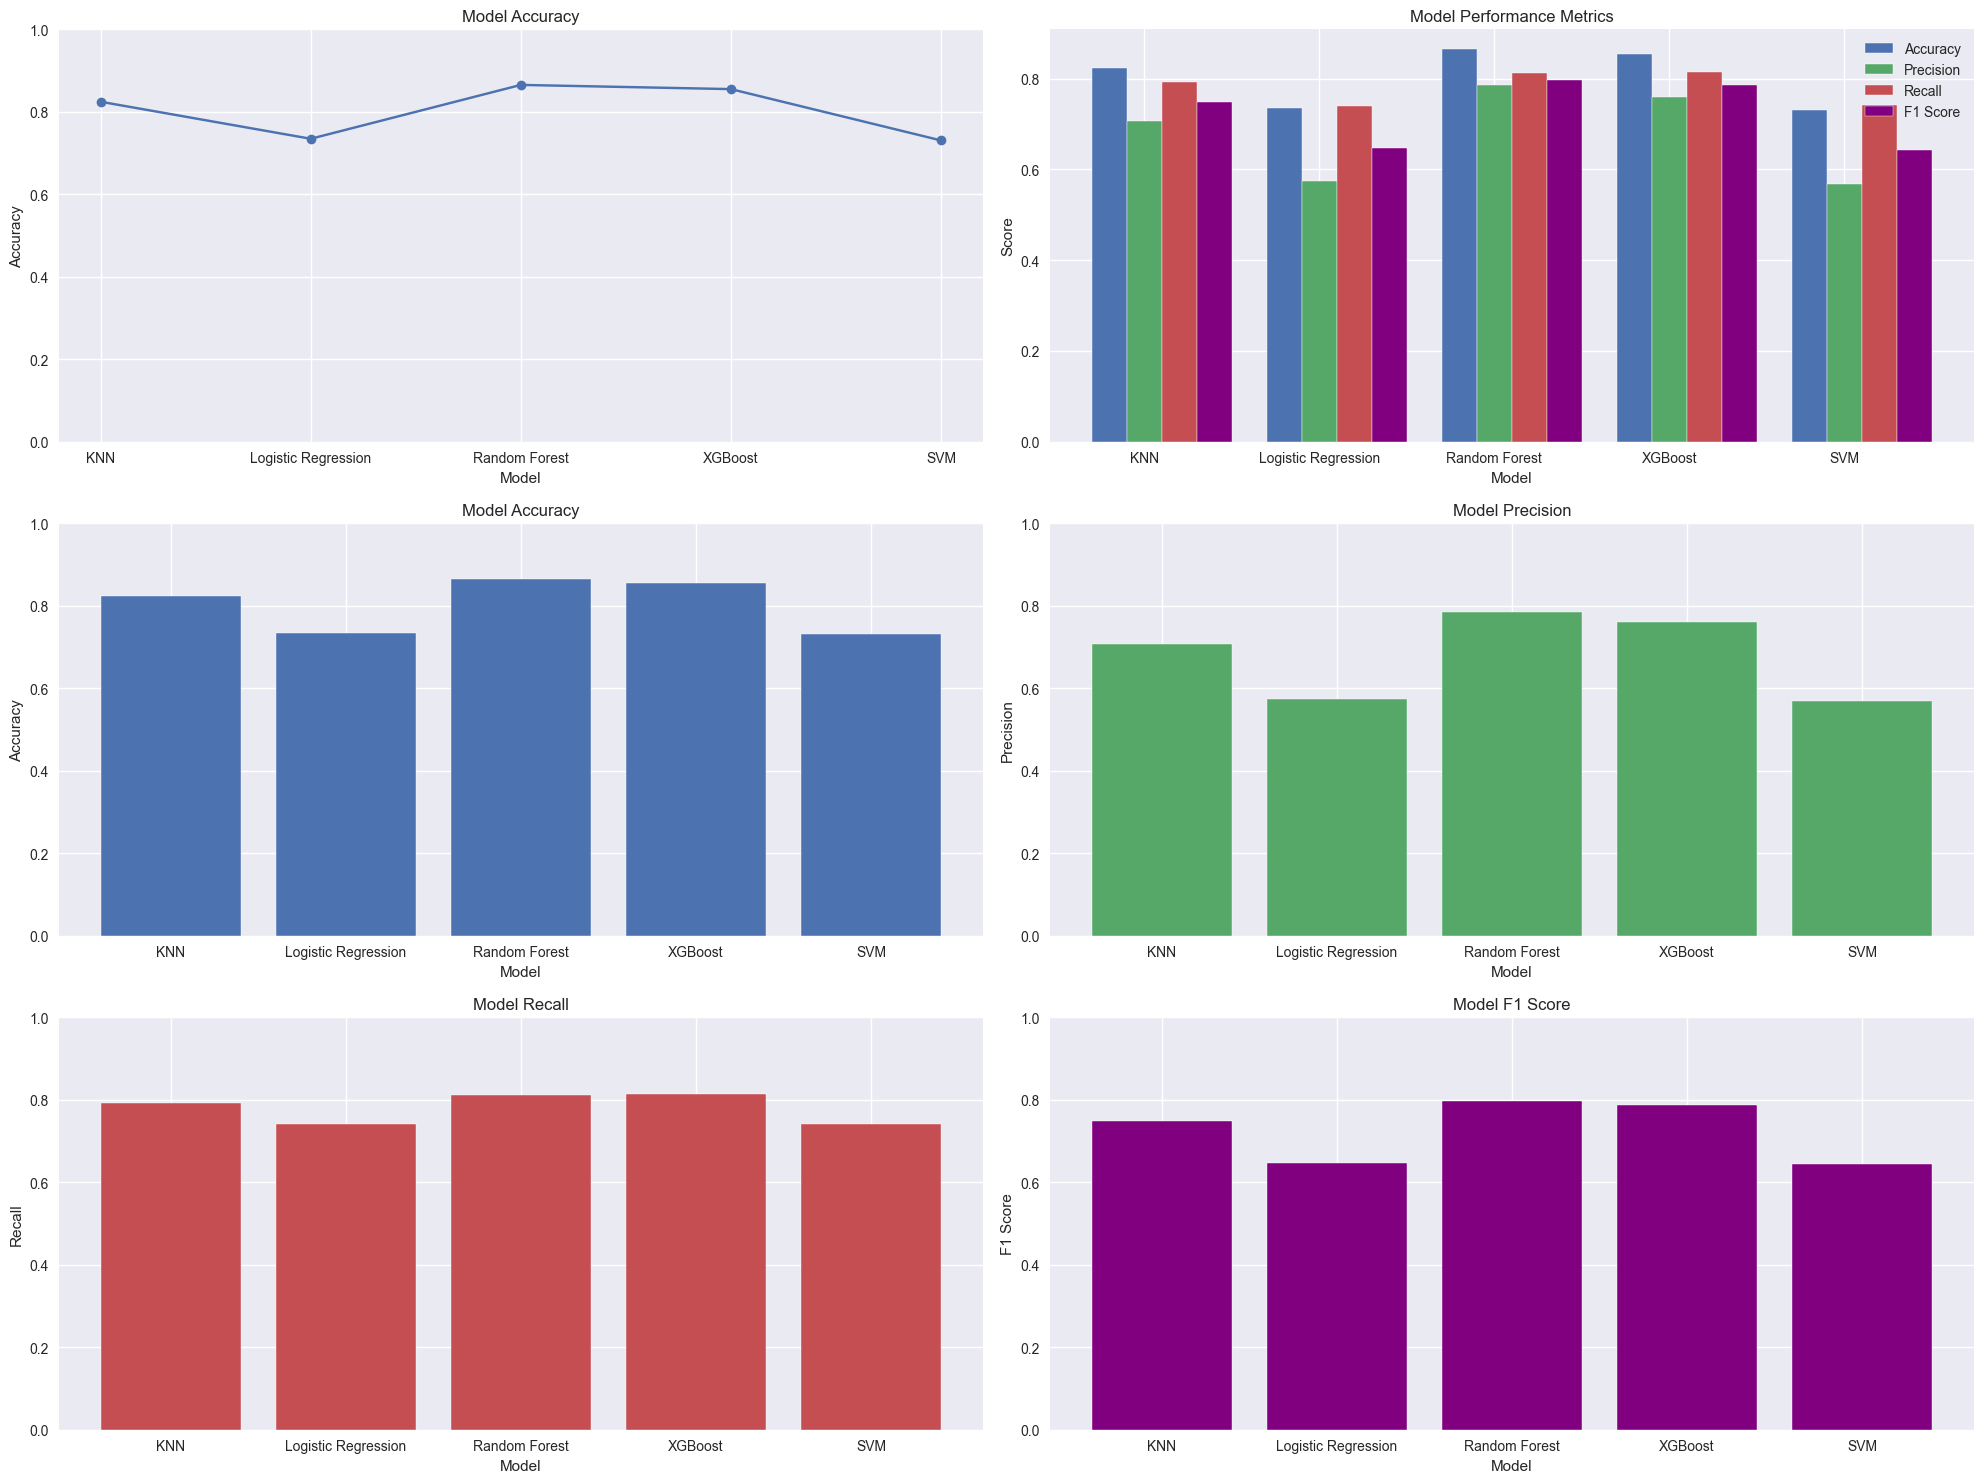

In [74]:
# Define model names and their corresponding metrics
models = ['KNN', 'Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
accuracies = [accuracy_knn, accuracy_log_reg, accuracy_rf, accuracy_xgb, accuracy_svm]
precisions = [precision_knn, precision_log_reg, precision_rf, precision_xgb, precision_svm]
recalls = [recall_knn, recall_log_reg, recall_rf, recall_xgb, recall_svm]
f1_scores = [f1_knn, f1_log_reg, f1_rf, f1_xgb, f1_svm]

# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# Plot 1: Line Plot for Accuracy
plt.subplot(3, 2, 1)
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Plot 2: Bar Plot for Accuracy, Precision, Recall, and F1 Score
x = np.arange(len(models))
width = 0.2

plt.subplot(3, 2, 2)
plt.bar(x - width, accuracies, width, label='Accuracy', color='b')
plt.bar(x, precisions, width, label='Precision', color='g')
plt.bar(x + width, recalls, width, label='Recall', color='r')
plt.bar(x + 2*width, f1_scores, width, label='F1 Score', color='purple')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(x, models)
plt.legend()

# Plot 3: Accuracy
plt.subplot(3, 2, 3)
plt.bar(models, accuracies, color='b')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Plot 4: Precision
plt.subplot(3, 2, 4)
plt.bar(models, precisions, color='g')
plt.title('Model Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)

# Plot 5: Recall
plt.subplot(3, 2, 5)
plt.bar(models, recalls, color='r')
plt.title('Model Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)

# Plot 6: F1 Score
plt.subplot(3, 2, 6)
plt.bar(models, f1_scores, color='purple')
plt.title('Model F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
